# Austin Animal Shelter: What puts an animal at risk of having a longer adoption time?
This analysis is based on [Austin Animal Shelter](http://www.austintexas.gov/department/aac) data from 2014 to 2018. Data are available through [Kaggle](https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes#aac_intakes_outcomes.csv).

<img src="http://www.austintexas.gov/sites/default/files/aac_logo.jpg" width=400px align="center"><br>
[Image Credit](http://www.austintexas.gov/department/aac)

## Analysis Outline
### [0. Dataset Overview](#0.-Dataset-Overview)
> a. [Distribution of animal shelter times](#0a.-Distribution-of-shelter-times)

### [1. Common Trends in Adoption Times](#1.-Common-Trends-in-Adoption-Times) <br>
This portion of the analysis address the majority of dogs in the dataset and serves to identify trends in ***most*** shelter dogs.

> a. [Animal type](#1a.-What-animal-types-have-the-longest-adoption-times?)<br>
> b. [Dog breed](#1b.-Does-dog-breed-affect-adoption-time?)<br>
> c. [Dog breed group (AKC)](#1c.-Do-certain-breed-groups-have-longer-adoption-times?)<br>
> d. [Mixed breed v. purebreed](#1d.-Is-there-an-effect-of-being-mixed-breed-or-purebred-on-adoption-times?)<br>
> e. [Dog age](#1e.-Do-older-dogs-have-a-harder-time-getting-adopted-than-puppies?)<br>
> f. [Black dog syndrome](#1f.-Is-Black-Dog-Syndrome-occuring-at-the-Austin-Animal-Shelter?)<br>
> g. [Coat color](#1g.-Does-being-multicolor-versus-single-colored-have-an-effect-on-adoption-time?)<br>

### [2. Long adoption times: Top 5th percentile of adoption times](#2.-Long-adoption-times)
This portion of the analysis serves to determine what factors may contribute to a dog having an extraoridinarly ***long*** adoption time.
> a. [Animal type](#2a.-What-animal-types-are-most-likely-to-spend-an-unusal-amount-of-time-in-the-shelter?)<br>
> b. [Dog breed](#2b.-Are-certain-breeds-more-likely-to-have-long-adoption-times?)<br>
> c. [Dog breed group (AKC)](#2c.-Are-there-higher-adoption-times-for-certain-breed-groups?-Are-certain-groups-more-highly-represented-in-this-long-adoption-subset?)<br>
> d. [Mixed breed v. purebreed](#2d.-Is-there-an-effect-of-being-mixed-breed-or-purebred-on-adoption-times-in-dogs-with-long-adoption-times?)<br>
> e. [Dog age](#2e.-Is-there-an-effect-of-age-on-longer-adoption-times?)<br>
> f. [Black dog syndrome](#2f.-Is-Black-Dog-Syndrome-more-prevalent-in-dogs-with-long-adoption-times?)<br>
> g. [Coat color](#2g.-Having-a-single-color-vs.-multicolor-coat-also-does-not-affect-adoption-time-in-dogs-with-long-adoption-times.)<br>

### [3. Most Popular Adoption Times](#3.-What-times-are-pets-most-likely-to-be-adopted?)
> a. [Season](#3a.-Adoption-Trends-by-Season)<br>
> b. [Time of day](#3b.-Adoption-Trends-by-Time-of-Day)<br>
> c. [Day of week](#3c.-Adoption-Times-by-Day-of-Week)<br>

### [4. Predictions for Adoption Times](#4.-Predict-time-in-shelter)
I apply machine learning techniques to create a model that predicts shelter times for animals based on data available at intake.
> a. [Data Preparation](#Data-Preparation)<br>
> b. [Linear Regression](#Linear-Regression)<br>
> c. [Support Vector Regression](#Support-Vector-Regression-(SVR))<br>
> d. [Ensemble Methods](#Ensemble-Methods)<br>
> d. [Model Testing](#-Model-Testing)<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('aac_intakes_outcomes.csv', parse_dates=True)

In [3]:
sns.set_context("talk")

# 0. Dataset Overview

In [4]:
df.shape

(79672, 41)

In [5]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
age_upon_outcome              79672 non-null object
animal_id_outcome             79672 non-null object
date_of_birth                 79672 non-null object
outcome_subtype               36348 non-null object
outcome_type                  79662 non-null object
sex_upon_outcome              79671 non-null object
age_upon_outcome_(days)       79672 non-null int64
age_upon_outcome_(years)      79672 non-null float64
age_upon_outcome_age_group    79672 non-null object
outcome_datetime              79672 non-null object
outcome_month                 79672 non-null int64
outcome_year                  79672 non-null int64
outcome_monthyear             79672 non-null object
outcome_weekday               79672 non-null object
outcome_hour                  79672 non-null int64
outcome_number                79672 non-null float64
dob_year                      79672 non-null int64
dob_month 

In [7]:
df.outcome_datetime = pd.to_datetime(df.outcome_datetime)

## 0a. Distribution of shelter times
A quick look shows that time in shelter days is not normally distributed and there are long tails in the data.
<br>[Return to Table of Contents](#Analysis-Outline)

Text(0, 0.5, 'Time in Shelter (Days)')

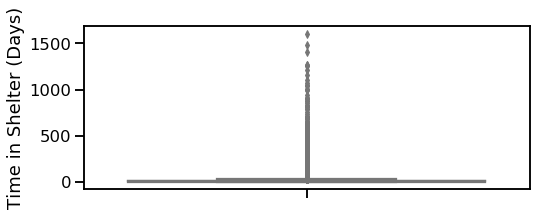

In [8]:
plt.figure(figsize=(8, 3))
ax = sns.boxplot(y='time_in_shelter_days', palette='Paired', data=df)
plt.ylabel('Time in Shelter (Days)')

Here, we see that most of the adoption time data fall to the extreme left end of the axis, with the mean shown in purple and the 95th percentile in blue (~71 days). Looking at the mean and median for shelter times supports this skew of the data to the left: while the median is almost 17 days, the mean is only ~5 days.

In [9]:
mean = np.mean(df.time_in_shelter_days)
median = np.median(df.time_in_shelter_days)
mean, median

(16.75711554526339, 4.987152777777778)

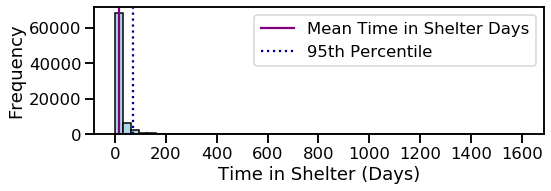

In [10]:
plt.figure(figsize=(8,3))
ax = df.time_in_shelter_days.plot(kind='hist', bins=50, color='LightBlue', ec='black')
ax.axvline(df.time_in_shelter_days.mean(), color='purple')
ax.axvline(df.time_in_shelter_days.quantile(0.95), linestyle=':', color='darkblue')
ax.set_xlabel('Time in Shelter (Days)')
plt.legend(['Mean Time in Shelter Days', '95th Percentile'])
plt.tight_layout()
sns.set_context("notebook")
plt.savefig('shelter_time_distribution.jpg', dpi=500)

As will become relevant in [section 4](#4.-Predict-time-in-shelter), I've shown below that shelter time can be log-transformed to display a more normal distribution.

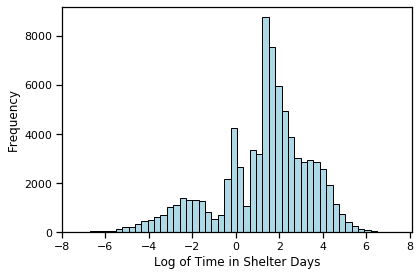

In [11]:
df[df.time_in_shelter_days==0] = df[df.time_in_shelter_days==0].replace(0, np.nan)
plt.hist(np.log(df.time_in_shelter_days),bins=50, color='LightBlue', ec='black')
plt.xlabel('Log of Time in Shelter Days')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('shelter_time_log_distribution.jpg', dpi=500)

**Since we are particularly interested in this group of animals with long adoption times, we want to look at them independently. I will conduct two analyses:**
1. Adoption times for 95% of the data representing adoption times <71 days
2. Adoption times for our outliers, the highest 5% of the data, representing adoption times >71 days

In [12]:
# We'll use this cutoff to exclude outliers
outliers = df.time_in_shelter_days.quantile(0.95)
outliers

71.10902777777778

Here, we can see 95% of the data and still see an exponential distribution, with most animals being adopted quickly.

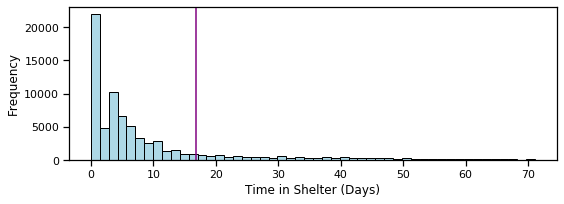

In [13]:
plt.figure(figsize=(8,3))
ax = df[df.time_in_shelter_days<outliers].time_in_shelter_days.plot(kind='hist', bins=50, color='LightBlue', ec='black')
ax.axvline(df.time_in_shelter_days.mean(), color='purple')
ax.set_xlabel('Time in Shelter (Days)')
plt.tight_layout()
plt.savefig('shelter_time_outlier_distribution.jpg', dpi=500)

***

# 1. Common Trends in Adoption Times
This analysis only includes animals with time in shelter days within the 95th percentile, below ~71 days for all animals and ~65 days for only dogs. The point of this analysis is to look at what trends in adoption times exist for a typical animal in the shelter.

In [14]:
df_95 = df[df['time_in_shelter_days']<outliers]

In [15]:
df['animal_type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird'], dtype=object)

In [16]:
dogs_95 = df_95[df_95['animal_type'] == 'Dog']
cats_95 = df_95[df_95['animal_type'] == 'Cat']
birds_95 = df_95[df_95['animal_type'] == 'Bird']
other_95 = df_95[df_95['animal_type'] == 'Other']

## 1a. What animal types have the longest adoption times?
This dataset includes data for dogs, cats, birds, and "other", which include animals such as rabbits.
<br>[Return to Table of Contents](#Analysis-Outline)

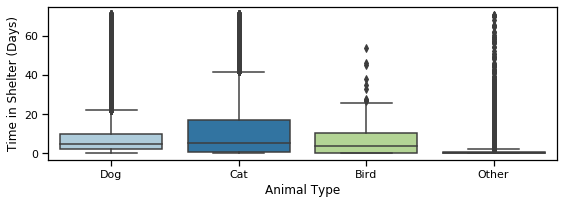

In [17]:
plt.figure(figsize=(8, 3))
ax = sns.boxplot(x='animal_type', y='time_in_shelter_days', palette='Paired', 
                 data=df_95, order=['Dog', 'Cat', 'Bird', 'Other'])
ax.set_xlabel('Animal Type')
plt.ylabel('Time in Shelter (Days)')
plt.tight_layout()
plt.savefig('animal_type_box_normal.jpg', dpi=500)

#### Dogs are the most common animal type, and birds are very uncommon.

In [18]:
df_95['animal_type'].describe()

count     75687
unique        4
top         Dog
freq      43357
Name: animal_type, dtype: object

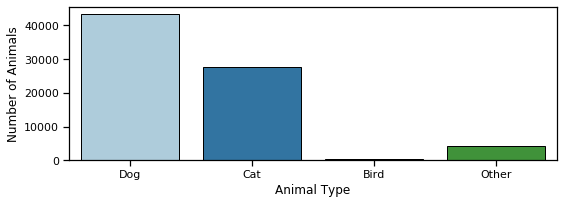

In [19]:
plt.figure(figsize=(8,3))
sns.barplot(x=df_95.groupby('animal_type').count().index, 
            y=df_95.groupby('animal_type').count()['age_upon_outcome'], 
            data=df_95.groupby('animal_type').count(), palette='Paired', 
            ec='black', order=['Dog', 'Cat', 'Bird', 'Other'])
plt.xlabel('Animal Type')
plt.ylabel('Number of Animals')
plt.tight_layout()
plt.savefig('animal_type_vol_normal.jpg', dpi=500)

In [20]:
stats.f_oneway(dogs_95['time_in_shelter_days'], 
               cats_95['time_in_shelter_days'],
               birds_95['time_in_shelter_days'],
               other_95['time_in_shelter_days'])

F_onewayResult(statistic=843.9932928046212, pvalue=0.0)

In [21]:
animals = df_95['animal_type'].unique()
def ttest_all(categorical_list, df_name, categorical_variable, test_variable):
    # run a ttest of each category against all 'others'
    # categorical list = list of the variables to be tested
    # cateogrical_variable and test_variable should be provided as strings
    
    df_list = []
    for i in categorical_list:
        others = df_name[df_name[categorical_variable]!=i]
        i_var = df_name[df_name[categorical_variable]==i]
        i_mean = np.mean(i_var[test_variable])
        o_mean = np.mean(others[test_variable])
        ttest, pvalue = stats.ttest_ind(i_var[test_variable], others[test_variable])
        df_list.append([i, i_mean, o_mean, ttest, pvalue])

    pval = pd.DataFrame(df_list)
    pval.columns = ['Variable', 'Mean', 'Mean of Others', 'T-test Statistic', 'p-value']
    return pval

ttest_all(animals, df_95, 'animal_type', 'time_in_shelter_days')

,Variable,Mean,Mean of Others,T-test Statistic,p-value
0,Dog,9.163792,11.378805,-21.015789,8.962822e-98
1,Cat,12.845390,8.538205,40.073581,0.000000e+00
2,Other,2.408066,10.582225,-36.799732,7.486708e-294
3,Bird,7.601964,10.121194,-3.212683,1.315565e-03


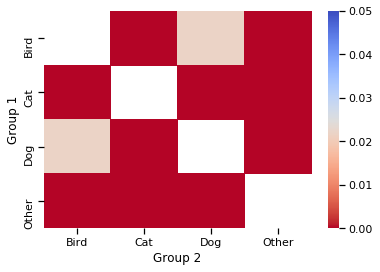

In [22]:
def pairwise_ttest(categorical_list, df_name, category_variable, test_variable, graph=False):
    # run pairwise t-tests across each variable and output as a heatmap of p-values (because it's fun)
    # or as a dataframe (default)

    test_list = []
    for i in range(len(categorical_list)):
        c = categorical_list[i]
        df_c = df_name.loc[df_name[category_variable]==c, test_variable]
        test_list.append(df_c)
    
    df_list = []
    for i, x in enumerate(test_list):
         for j,y in enumerate(test_list):
                if i!=j:
                    name_1 = categorical_list[i]
                    name_2 = categorical_list[j]
                    ttest, pvalue = stats.ttest_ind(x, y)
                    df_list.append([name_1, name_2, ttest, pvalue])

    pval = pd.DataFrame(df_list)
    pval.columns = ['Group 1', 'Group 2', 'Test Statistic', 'p-value']
    pval = pval.pivot('Group 1', 'Group 2', 'p-value')
    
    if graph==False:
        return pval
    else:
        ax = sns.heatmap(pval, cmap='coolwarm_r', vmin=0, vmax=.05)
            
pairwise_ttest(animals, df_95, 'animal_type', 'time_in_shelter_days',  graph=True)

In [23]:
pairwise_ttest(animals, df_95, 'animal_type', 'time_in_shelter_days')

Group 2,Bird,Cat,Dog,Other
Group 1,,,,
Bird,NaN,1.914413e-08,2.193693e-02,1.545838e-31
Cat,1.914413e-08,NaN,1.353010e-237,0.000000e+00
Dog,2.193693e-02,1.353010e-237,NaN,3.749485e-266
Other,1.545838e-31,0.000000e+00,3.749485e-266,NaN


#### All animal types are significantly different from each other. Cats have the longest average adoption time (12.8 days), followed by dogs (9.2 days), birds (7.6 days), then other (2.4 days).

<img src="https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png" width=300px align="left">
<br><br><br><br><br><br><br><br>

[Image Credit](https://icatcare.org/advice/thinking-of-getting-a-cat/)

## 1b - 1g. A closer look at adoption times for man's best friend
For parts 1b - 1g, outliers are defined as the 95th percentile just for dogs, approximately 65 days.

<img src="http://wholesolutionsgroup.com/wp-content/uploads/2016/08/Man-and-Dog--1080x675.jpg" width=400px align=left><br>
<br><br><br><br><br><br><br><br><br><br><br><br>
[Image Credit](http://wholesolutionsgroup.com/why-dogs-are-mans-best-friend/)

In [24]:
dog_outliers = df.loc[df['animal_type']=='Dog', 'time_in_shelter_days'].quantile(0.95)
dog_outliers

65.10583333333332

In [25]:
dogs = df[df['animal_type']=='Dog']
dogs = dogs[dogs['time_in_shelter_days']<dog_outliers]

## 1b. Does dog breed affect adoption time?
In this section, I hypothesized that stereotypically common shelter breeds, such as ***Pit Bulls and Chihuahuas***,  have longer adoption times than other breeds.
<br>[Return to Table of Contents](#Analysis-Outline)

Pit Bulls and Chihuahuas are the most common breeds at this shelter.

In [26]:
dogs['breed'].value_counts().head()

Pit Bull Mix                 5529
Chihuahua Shorthair Mix      4706
Labrador Retriever Mix       4552
German Shepherd Mix          1899
Australian Cattle Dog Mix    1029
Name: breed, dtype: int64

Because many of the animals at this shelter were categorized as mixed breeds, it became impossible to see patterns by breed - there were 1883 unique breed categorizations. To simplify this analysis, I sorted the data such that each breed is a unique column, and each animal has a 1 or 0 based on whether it is in part or full that breed. I further created a mixed breed/purebred column to later analyze whether purebreds are adopted more quickly than mixed breeds.

In [27]:
dogs['breed'].nunique()

1879

In [28]:
# replace slash in Black/Tan Hounds so we can splice mixed breeds into unique breeds
dogs['breed'] = dogs['breed'].str.replace('Black/Tan Hound', 'Black-Tan Hound')
dogs['breed'] = dogs['breed'].str.replace('Dachshund Stan', 'Dachshund')
dogs['breed'] = dogs['breed'].str.replace('Dachshund Wirehair', 'Dachshund')

# combine data for shorthair and longhair chihuahuas
dogs['breed'] = dogs['breed'].str.replace(' Shorthair', '')
dogs['breed'] = dogs['breed'].str.replace(' Longhair', '')

# remove "mix" to get an accurate breed list
dogs['breed_nomix'] = dogs['breed'].str.replace(' Mix', '')

dogs['breed_list'] = dogs['breed_nomix'].str.split('/')

# add a column that specifies mixed breed v. purebreed for later analyses
dogs.loc[dogs.breed_list.str.len()>1, 'mixed_breed'] = 'Mixed Breed'
dogs.loc[dogs['breed'].str.contains('Mix'), 'mixed_breed'] = 'Mixed Breed'
dogs['mixed_breed'] = dogs['mixed_breed'].fillna('Purebred')

In [29]:
has_breeds = pd.get_dummies(dogs['breed_list'].apply(pd.Series).stack()).sum(level=0)

In [30]:
dog_breeds_combined = pd.concat([dogs, has_breeds], axis=1)

In [31]:
breed_melt1 = dog_breeds_combined[['breed_list', 'mixed_breed', 'time_in_shelter_days']]
breed_melt2 = dog_breeds_combined.loc[:, 'Affenpinscher':]
breed_melt = pd.concat([breed_melt1, breed_melt2], axis=1)
dog_breeds = pd.melt(breed_melt, id_vars=['breed_list','mixed_breed','time_in_shelter_days'], 
                       var_name='breed_name', value_name='has_breed')
dog_breeds.loc[dog_breeds['has_breed']==1, 'breed'] = dog_breeds['breed_name']
dog_breeds = dog_breeds.dropna()

In [32]:
dog_breeds.head()

,breed_list,mixed_breed,time_in_shelter_days,breed_name,has_breed,breed
3132,"[Cairn Terrier, Affenpinscher]",Mixed Breed,21.153472,Affenpinscher,1,Affenpinscher
3790,"[Shih Tzu, Affenpinscher]",Mixed Breed,6.000694,Affenpinscher,1,Affenpinscher
5448,[Affenpinscher],Mixed Breed,0.157639,Affenpinscher,1,Affenpinscher
5521,"[Border Terrier, Affenpinscher]",Mixed Breed,5.160417,Affenpinscher,1,Affenpinscher
5538,[Affenpinscher],Mixed Breed,2.056944,Affenpinscher,1,Affenpinscher


Because there are 199 unique dog breeds represented, I've looked only at the 25 most common breeds.

**Of note, Labrador Retrievers, Chihuahuas, and Pit Bulls are substantially more common than the other breeds, by 200%.**

In [33]:
dog_breeds['breed'].nunique()

197

In [34]:
dog_breeds['breed'].value_counts().head(25)

Labrador Retriever       6830
Chihuahua                6612
Pit Bull                 6518
German Shepherd          2889
Dachshund                1914
Australian Cattle Dog    1620
Border Collie            1093
Miniature Poodle         1091
Boxer                    1090
Beagle                    837
Jack Russell Terrier      723
Yorkshire Terrier         715
Catahoula                 696
Australian Shepherd       695
Rat Terrier               694
Siberian Husky            689
Miniature Schnauzer       659
Great Pyrenees            612
Rottweiler                542
Pointer                   523
Shih Tzu                  497
Cairn Terrier             490
Staffordshire             397
Anatol Shepherd           397
American Bulldog          361
Name: breed, dtype: int64

In [35]:
top_25_breeds = dog_breeds['breed'].value_counts().head(25).index

In [36]:
top_25_breed_df = dog_breeds[dog_breeds['breed'].isin(top_25_breeds)]

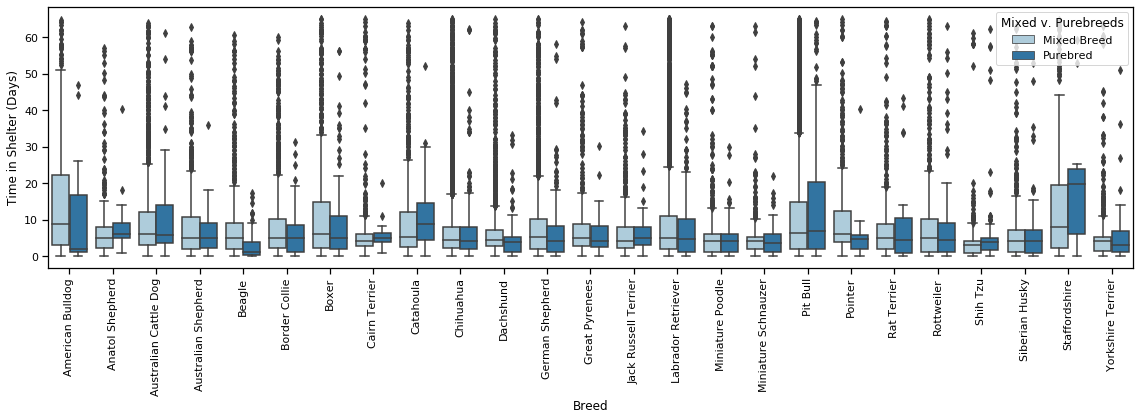

In [37]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='breed', y='time_in_shelter_days', hue='mixed_breed', 
                    data=top_25_breed_df, palette='Paired')
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')
plt.legend(title='Mixed v. Purebreeds', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('breed_box_normal.jpg', dpi=500)

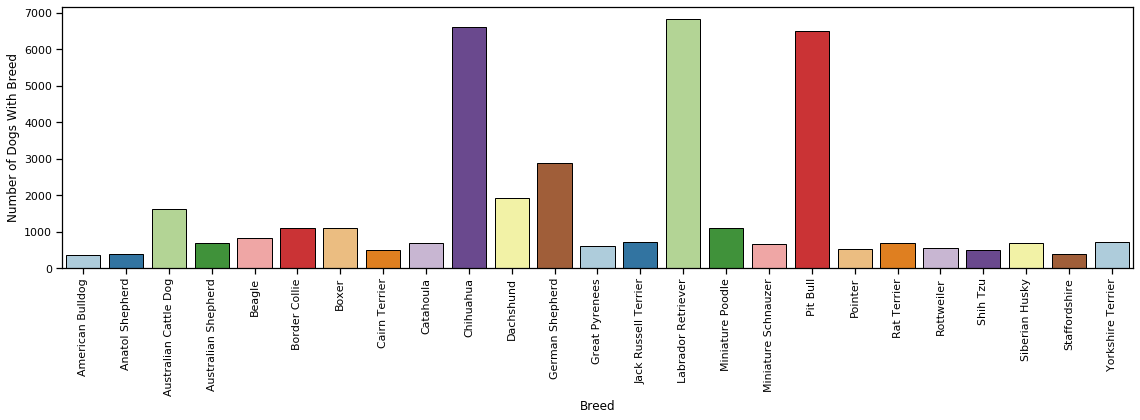

In [38]:
plt.figure(figsize=(16,6))
sns.barplot(x=top_25_breed_df.groupby('breed').count().index, 
            y=top_25_breed_df.groupby('breed').count()['breed_name'], 
            data=top_25_breed_df.groupby('breed').count(), palette='Paired', 
            ec='black')
plt.xlabel('Breed')
plt.ylabel('Number of Dogs With Breed')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('breed_vol_normal.jpg', dpi=500)

Using a t-test, I determined that 22 of the 25 common breeds had significantly different time in shelter days than the group mean ("Mean of Others" below). Of note are the adoption times for the three most common breeds: Pit Bulls and Labradors have longer adoption times, while Chihuahuas have shorter adoption times. German Shepherds also have a slightly shorter than average adoption time.

In [39]:
top_25_breeds_pval = ttest_all(top_25_breeds, top_25_breed_df, 'breed', 'time_in_shelter_days')

In [40]:
top_25_breeds_significant = top_25_breeds_pval[top_25_breeds_pval['p-value']<0.05]
top_25_breeds_significant.sort_values('Mean')

,Variable,Mean,Mean of Others,T-test Statistic,p-value
20,Shih Tzu,4.734070,9.184889,-8.196477,2.549757e-16
16,Miniature Schnauzer,4.955924,9.199810,-8.982121,2.771275e-19
11,Yorkshire Terrier,5.456601,9.196683,-8.237963,1.805399e-16
7,Miniature Poodle,5.681541,9.227157,-9.602661,8.233953e-22
15,Siberian Husky,6.754604,9.170924,-5.223624,1.763507e-07
4,Dachshund,7.005968,9.237436,-7.914849,2.540252e-15
10,Jack Russell Terrier,7.100436,9.166559,-4.573050,4.821435e-06
1,Chihuahua,7.509319,9.457111,-12.016685,3.322136e-33
23,Anatol Shepherd,7.597353,9.144108,-2.547124,1.086527e-02
9,Beagle,7.615721,9.161454,-3.675297,2.378900e-04


In [41]:
top_25_breeds_significant['Variable'].nunique()

22

I next completed a bootstrap analysis to determine if the observed means could be replicated after 10,000 replicates. I've written the following functions to complete a comparison of each variable to all other data:

In [42]:
from progressbar import ProgressBar
np.random.seed(47)
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def bootstrap(groupa, groupb):
    
    mean_diff = np.mean(groupa) - np.mean(groupb)
    
    bs_replicates_a = draw_bs_reps(groupa, np.mean, size=10000)
    bs_replicates_b = draw_bs_reps(groupb, np.mean, size=10000)
    
    bs_diff_replicates = bs_replicates_a - bs_replicates_b
    
    conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
    
    # Compute mean of combined data set: combined_mean
    combined_mean = np.mean(np.concatenate([groupa, groupb]))

    # Shift the samples
    shifted_a = groupa - np.mean(groupa) + combined_mean
    shifted_b = groupb - np.mean(groupb) + combined_mean

    # Get bootstrap replicates of shifted data sets
    bs_replicates_a_shifted = draw_bs_reps(shifted_a, np.mean, 10000)
    bs_replicates_b_shifted = draw_bs_reps(shifted_b, np.mean, 10000)

    # Compute replicates of difference of means: bs_diff_replicates
    bs_diff_replicates_shifted = bs_replicates_a_shifted - bs_replicates_b_shifted

    # Compute the p-value for significantly higher values
    p_high = np.sum(bs_diff_replicates_shifted >= mean_diff) / len(bs_diff_replicates_shifted)
   
    # Compute the p-value for significantly lower values
    p_low = np.sum(bs_diff_replicates_shifted <= mean_diff) / len(bs_diff_replicates_shifted)
    
    return mean_diff, conf_int, p_high, p_low

def bootstrap_all(categorical_list, df_name, categorical_variable, test_variable):
    #similar to ttest_all - compare data for each variable in categorical_list to all other data
    
    pbar = ProgressBar() 
    df_list = []
    for i in pbar(categorical_list):
        others = df_name[df_name[categorical_variable]!=i].dropna(subset=[test_variable])
        i_var = df_name[df_name[categorical_variable]==i].dropna(subset=[test_variable])
        i_mean = np.mean(i_var[test_variable])
        o_mean = np.mean(others[test_variable])
        meandiff, conf_int, p_high, p_low = bootstrap(i_var[test_variable], others[test_variable])
        df_list.append([i, i_mean, o_mean, meandiff, conf_int, p_high, p_low])

    pval = pd.DataFrame(df_list)
    pval.columns = ['Variable', 'Mean', 'Mean of Others', 'Mean Difference', '95% CI', 'p-value_high', 'p-value_low']
    return pval

In [43]:
top_25_breeds_bootstrap = bootstrap_all(top_25_breeds, top_25_breed_df, 'breed', 'time_in_shelter_days')

100% |########################################################################|


In [44]:
top_25_breeds_bootstrap.dropna(subset=['Mean'], inplace=True)
top_25_breeds_bootstrap[(top_25_breeds_bootstrap['p-value_high']<0.05)|(top_25_breeds_bootstrap['p-value_low']<0.05)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,Labrador Retriever,9.870826,8.971716,0.899110,"[0.5625058065667636, 1.2420133695071707]",0.0000,1.0000
1,Chihuahua,7.509319,9.457111,-1.947793,"[-2.217165572620566, -1.6748399636756885]",1.0000,0.0000
2,Pit Bull,11.885274,8.578352,3.306922,"[2.925418523398046, 3.6793220309462162]",0.0000,1.0000
3,German Shepherd,8.579918,9.172097,-0.592179,"[-1.0040804636459675, -0.16337963859891913]",0.9971,0.0029
4,Dachshund,7.005968,9.237436,-2.231468,"[-2.6496537195879215, -1.7926033645022483]",1.0000,0.0000
5,Australian Cattle Dog,10.648964,9.062861,1.586103,"[0.972655837694978, 2.2042317439131143]",0.0000,1.0000
7,Miniature Poodle,5.681541,9.227157,-3.545616,"[-4.029160560363749, -3.043996108423577]",1.0000,0.0000
8,Boxer,11.766114,9.052963,2.713150,"[1.872811366050448, 3.593165954520292]",0.0000,1.0000
9,Beagle,7.615721,9.161454,-1.545734,"[-2.233159107857921, -0.8359324647916728]",1.0000,0.0000
10,Jack Russell Terrier,7.100436,9.166559,-2.066123,"[-2.7132340231765184, -1.4124878146768787]",1.0000,0.0000


#### Of our 4 most common breeds, Labs and Pit Bulls do have significantly longer adoption times; however, Chihuahuas and German Shepherds do not.

## 1c. Do certain breed groups have longer adoption times?

#### AKC groupings include the Hound Group, Terrier Group, Working Group, Herding Group, Sporting Group, Non-Sporting Group, Toy Group, and Miscellaneous
Here, I pulled data from the [AKC](https://en.wikipedia.org/wiki/List_of_dog_breeds) to categorize dog breeds into breed groups. Of note, **American Pit Bulls are not recognized by the AKC as a distinct dog breed.** 

Breed groups have histories of being bred for similar functions and traits, and here, I've hypothesized that the Working Group has longer adoption times and may be less desirable for families. 

The AKC website describes Working breeds as follows:
> They were developed to assist humans in some capacity – including pulling sleds and carts, guarding flocks and homes, and protecting their families – and many of these breeds are still used as working dogs today. Breeds in the Working Group tend to be known for imposing stature, strength, and intelligence.

More information on AKC breed groupings can be found [here](https://www.akc.org/expert-advice/lifestyle/7-akc-dog-breed-groups-explained/).
<br>[Return to Table of Contents](#Analysis-Outline)

I had to rename many of the dog breeds so that the dataframes would concatenate properly. I deferred to the breed names used by the animal shelter unless that would result in more issues; for example, I renamed all 3 poodle types to just "Poodle", as the AKC does not recognize Toy, Standard, and Miniature Poodles as separate breeds.

In [45]:
dog_groups = pd.read_csv('dogbreed_categories.csv', header=0)
dog_groups = dog_groups[['Breed', 'Origin', 'American Kennel Club[4]', 'United Kennel Club[9]']]
dog_groups.dropna(subset=['Breed'], inplace=True)

breed_rename = {'Alaskan husky':'Alaskan Husky', 'American Eskimo Dog':'American Eskimo', 
                'Anatolian Shepherd Dog':'Anatol Shepherd', 'Bedlington Terrier':'Bedlington Terr', 
                'Belgian Shepherd Dog (Malinois)':'Belgian Malinois', 'Belgian Shepherd Dog (Tervuren)':'Belgian Tervuren',
                'Bichon Frisé':'Bichon Frise', 'Black and Tan Coonhound':'Black-Tan Hound',
                'Bluetick Coonhound':'Bluetick Hound', 'Bouvier des Flandres':'Bouv Flandres', 
                'Boykin Spaniel':'Boykin Span', 'Brussels Griffon':'Bruss Griffon', 'Welsh Corgi, Cardigan':'Cardigan Welsh Corgi',
                'Louisiana Catahoula Leopard Dog':'Catahoula', 'King Charles Spaniel':'Cavalier Span',
                'Chesapeake Bay Retriever':'Chesa Bay Retr', 'Chinese Crested Dog':'Chinese Crested',
                'Shar Pei':'Chinese Sharpei', 'American Cocker Spaniel':'Cocker Spaniel', 'Collie, Rough':'Collie Rough', 
                'Collie, Smooth':'Collie Smooth', 'Coton de Tulear':'Coton De Tulear', 'Dandie Dinmont Terrier':'Dandie Dinmont', 
                'Doberman Pinscher':'Doberman Pinsch', 'Dogue de Bordeaux':'Dogue De Bordeaux', 'Bulldog':'English Bulldog', 
                'American English Coonhound':'English Coonhound', 'Entlebucher Mountain Dog':'Entlebucher',
                'Flat-Coated Retriever':'Flat Coat Retriever', 'German Shorthaired Pointer':'German Pointer', 
                'German Shepherd Dog':'German Shepherd', 'Glen of Imaal Terrier':'Glen Of Imaal', 
                'Grand Basset Griffon Vendéen':'Grand Basset Griffon Vendeen', 'Kangal Shepherd Dog':'Kangal', 
                'Löwchen':'Lowchen', 'English Mastiff':'Mastiff', 'American Hairless Terrier':'Mexican Hairless',
                'Patterdale Terrier':'Patterdale Terr', 'Petit Basset Griffon Vendéen':'Pbgv', 
                'Welsh Corgi, Pembroke':'Pembroke Welsh Corgi', 'Picardy Spaniel':'Picardy Sheepdog', 
                'American Pit Bull Terrier':'Pit Bull', 'Portuguese Podengo':'Podengo Pequeno', 
                'Portuguese Water Dog':'Port Water Dog', 'Perro de Presa Canario':'Presa Canario', 
                'Lancashire Heeler':'Queensland Heeler', 'Redbone Coonhound':'Redbone Hound', 'Rhodesian Ridgeback':'Rhod Ridgeback',
                'Giant Schnauzer':'Schnauzer Giant', 'Sealyham Terrier':'Sealyham Terr', 'Fox Terrier, Smooth':'Smooth Fox Terrier',
                'Soft-Coated Wheaten Terrier':'Soft Coated Wheaten Terrier', 'Staffordshire Bull Terrier':'Staffordshire', 
                'Sussex Spaniel':'Sussex Span', 'Greater Swiss Mountain Dog':'Swiss Hound', 
                'Treeing Tennessee Brindle':'Treeing Tennesse Brindle', 'Yorkshire Terrier':'Yorkshire',
                'West Highland White Terrier':'West Highland', 'Fox Terrier, Wire':'Wire Hair Fox Terrier'
               }

dog_groups = dog_groups.replace({'Breed':breed_rename})

In [46]:
dog_breeds['breed'] = dog_breeds['breed'].str.replace('Miniature Poodle', 'Poodle')
dog_breeds['breed'] = dog_breeds['breed'].str.replace('Toy Poodle', 'Poodle')
dog_breeds['breed'] = dog_breeds['breed'].str.replace('Standard Poodle', 'Poodle')
dog_breeds['breed'] = dog_breeds['breed'].str.replace('St. Bernard Rough Coat', 'Saint Bernard')
dog_breeds['breed'] = dog_breeds['breed'].str.replace('St. Bernard Smooth Coat', 'Saint Bernard')

dog_breeds.loc[dog_breeds['breed']=='Pointer', 'breed'] = 'English Pointer'

In [47]:
breed_groups = pd.merge(left=dog_breeds, right=dog_groups, left_on='breed', right_on='Breed')

# exclude breeds that are not categorized by the AKC
AKCgroups = ['Hound Group', 'Terrier Group', 'Working Group', 'Herding Group', 
             'Sporting Group', 'Non-Sporting Group', 'Toy Group', 'Miscellaneous']
breed_groups = breed_groups[breed_groups['American Kennel Club[4]'].isin(AKCgroups)]

In [48]:
sortbreedgroup = breed_groups.groupby('American Kennel Club[4]').mean().sort_values('time_in_shelter_days', ascending=False)
sortbreedgroup = sortbreedgroup['time_in_shelter_days'].to_dict()

#### Miscellaneous breeds have the longest adoption times; however, there weren't many dogs falling into this category.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

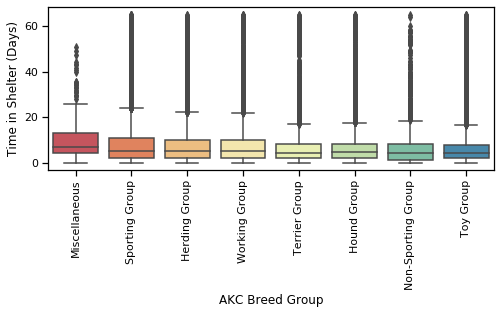

In [49]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='American Kennel Club[4]', y='time_in_shelter_days', 
                    data=breed_groups, palette='Spectral', order=sortbreedgroup)
plt.xlabel('AKC Breed Group')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

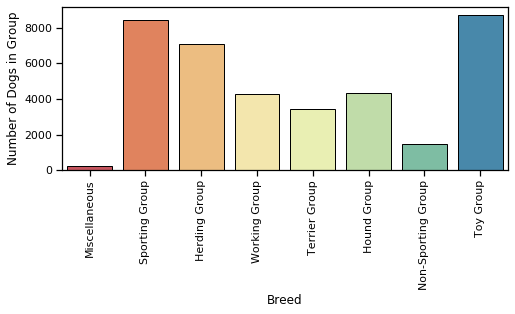

In [50]:
plt.figure(figsize=(8,3))
sns.barplot(x=breed_groups.groupby('American Kennel Club[4]').count().index, 
            y=breed_groups.groupby('American Kennel Club[4]').count()['breed_name'], 
            data=breed_groups.groupby('American Kennel Club[4]').count(), palette='Spectral', 
            order=sortbreedgroup, ec='black')
plt.xlabel('Breed')
plt.ylabel('Number of Dogs in Group')
plt.xticks(rotation=90)

Only these 3 breeds are in the Miscellaneous cateogry and represent a small number of dogs:

In [51]:
breed_groups.loc[breed_groups['American Kennel Club[4]']=='Miscellaneous', 'breed'].value_counts()

Queensland Heeler    202
Dutch Shepherd        35
Dogo Argentino        21
Name: breed, dtype: int64

In [52]:
groups_bootstrap = bootstrap_all(AKCgroups, breed_groups, 'American Kennel Club[4]', 'time_in_shelter_days')

100% |########################################################################|


In [53]:
groups_bootstrap[(groups_bootstrap['p-value_high']<0.05)|(groups_bootstrap['p-value_low']<0.05)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,Hound Group,7.901565,8.531067,-0.629502,"[-0.9604191605146242, -0.29114524389923657]",1.0000,0.0000
1,Terrier Group,8.041444,8.500504,-0.459060,"[-0.8597272537924344, -0.05364002993461544]",0.9901,0.0099
2,Working Group,9.031627,8.386960,0.644667,"[0.2569950438540989, 1.0336214957556509]",0.0006,0.9994
3,Herding Group,9.084883,8.315778,0.769105,"[0.4761805280099553, 1.0683415936955032]",0.0000,1.0000
4,Sporting Group,9.553319,8.147142,1.406177,"[1.1142513524764186, 1.7050342377900805]",0.0000,1.0000
5,Non-Sporting Group,7.497637,8.498383,-1.000746,"[-1.535374255902749, -0.4552516891724563]",0.9999,0.0001
6,Toy Group,7.147801,8.849222,-1.701421,"[-1.9452381866622188, -1.464148393511542]",1.0000,0.0000
7,Miscellaneous,10.890795,8.442444,2.448350,"[1.1844082412038153, 3.7734894214928736]",0.0000,1.0000


Based on this bootstrap, we see that **Working, Herding, Sporting, and Miscellaneous Group** dogs have significantly longer adoption times. Terriers, Hounds, Non-Sporting and Toy breeds all appear to have shorter adoption times. **Sporting** breed dogs appear to have the longest adoption times, and this group includes Labraodor Retrievers, which is one of the most commonly occurring breeds.

In [54]:
breed_groups.loc[breed_groups['American Kennel Club[4]']=='Sporting Group', 'breed'].value_counts()

Labrador Retriever                    6830
English Pointer                        554
Golden Retriever                       308
Cocker Spaniel                         238
Flat Coat Retriever                     97
Weimaraner                              83
Vizsla                                  72
German Pointer                          61
Brittany                                47
Chesa Bay Retr                          25
English Springer Spaniel                23
Nova Scotia Duck Tolling Retriever      14
German Wirehaired Pointer               11
Field Spaniel                           10
Irish Setter                             9
Wirehaired Pointing Griffon              9
Boykin Span                              8
English Setter                           7
English Cocker Spaniel                   7
Welsh Springer Spaniel                   6
Spinone Italiano                         3
Gordon Setter                            2
Sussex Span                              2
Name: breed

## 1d. Is there an effect of being mixed breed or purebred on adoption times?

Here, I hypothesized that mixed breed dogs have longer adoption times than purebred dogs.
<br>[Return to Table of Contents](#Analysis-Outline)

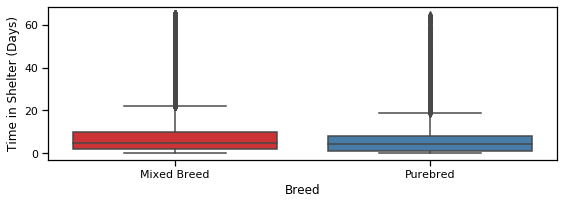

In [55]:
plt.figure(figsize=(8,3))
sns.boxplot(x='mixed_breed', y='time_in_shelter_days', 
                    data=dog_breeds, palette='Set1')
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')
plt.tight_layout()
plt.savefig('mixed_breed_box_normal.jpg', dpi=500)

Mixed breed dogs are far more common than purebred dogs.

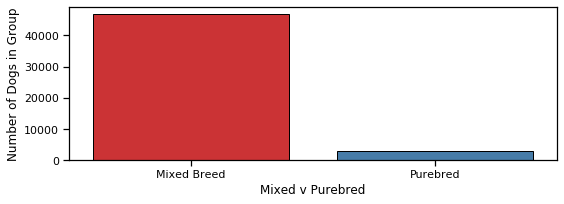

In [56]:
plt.figure(figsize=(8, 3))
sns.barplot(x=dog_breeds.groupby('mixed_breed').count().index, 
            y=dog_breeds.groupby('mixed_breed').count()['breed_name'], 
            data=dog_breeds.groupby('mixed_breed').count(), palette='Set1', 
            ec='black')
plt.xlabel('Mixed v Purebred')
plt.ylabel('Number of Dogs in Group')
plt.tight_layout()
plt.savefig('mixed_breed_vol_normal.jpg', dpi=500)

In [57]:
mixed_breed = dog_breeds[dog_breeds['mixed_breed']=='Mixed Breed']
purebred = dog_breeds[dog_breeds['mixed_breed']=='Purebred']
np.mean(mixed_breed['time_in_shelter_days']), np.mean(purebred['time_in_shelter_days']), stats.ttest_ind(mixed_breed['time_in_shelter_days'], purebred['time_in_shelter_days'])

(9.012789982904614,
 7.4017536704730915,
 Ttest_indResult(statistic=7.323141304499771, pvalue=2.4587469910872337e-13))

In [58]:
bootstrap(mixed_breed['time_in_shelter_days'], purebred['time_in_shelter_days'])

(1.6110363124315228, array([1.23415582, 1.98452465]), 0.0, 1.0)

#### From the t-test, we can see that mixed breed dogs have significantly longer adoption times than purebreed dogs.

## 1e. Do older dogs have a harder time getting adopted than puppies?

My hypothesis here is that puppies are adopted significantly faster than adult dogs, especially in the case of dogs >2.5 years old.


<img src="https://www.thelabradorsite.com/wp-content/uploads/2018/05/introducing-puppy-to-older-dog-header-696x377.jpg" width=300px align="left">
<br><br><br><br><br><br><br><br><br>

[Image Credit](https://www.thelabradorsite.com/introducing-puppy-to-older-dog/)
<br>[Return to Table of Contents](#Analysis-Outline)

Age is not a continuous variable in this dataset. Even when analyzed by age in days, its rounded up to the year.

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.]), <a list of 10 Text xticklabel objects>)

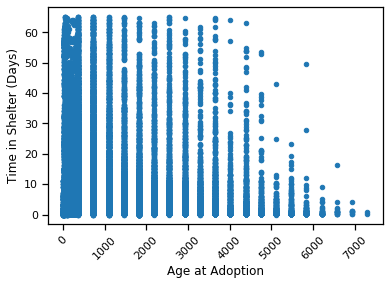

In [59]:
dogs.plot(x='age_upon_outcome_(days)', y='time_in_shelter_days', kind='scatter')
plt.xlabel('Age at Adoption')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=45)

#### Older dogs do not have longer adoption times overall; however, dogs <2.5 years old have a slight advantage over dogs between 2.5 - 5 years old.
Some of this effect may be due to fewer older animals in the shelter: there is less data for older dogs than for young ones.

In [60]:
dogs['age_group'] = dogs['age_upon_outcome_age_group'].str[1:-1]
dogs['age_group'] = dogs['age_group'].str.replace(', ','-')

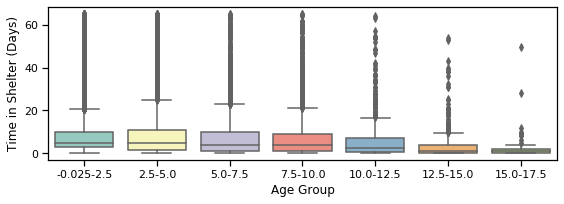

In [61]:
plt.figure(figsize=(8,3))
sns.boxplot(x='age_group', y='time_in_shelter_days', 
            data=dogs, palette='Set3',
            order=['-0.025-2.5', '2.5-5.0', '5.0-7.5',
                   '7.5-10.0', '10.0-12.5', '12.5-15.0',
                   '15.0-17.5'])
plt.xlabel('Age Group')
plt.ylabel('Time in Shelter (Days)')
plt.tight_layout()
plt.savefig('age_box_normal.jpg', dpi=500)

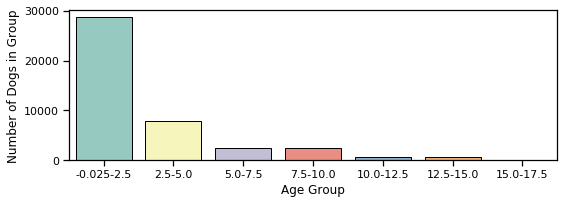

In [62]:
plt.figure(figsize=(8, 3))
sns.barplot(x=dogs.groupby('age_group').count().index, 
            y=dogs.groupby('age_group').count()['age_upon_outcome'], 
            data=dogs.groupby('age_group').count(), palette='Set3', 
            order=['-0.025-2.5', '2.5-5.0', '5.0-7.5',
                   '7.5-10.0', '10.0-12.5', '12.5-15.0',
                   '15.0-17.5'], ec='black')
plt.xlabel('Age Group')
plt.ylabel('Number of Dogs in Group')
plt.tight_layout()
plt.savefig('age_vol_normal.jpg', dpi=500)

In [63]:
age_groups = ['-0.025-2.5', '2.5-5.0', '5.0-7.5',
              '7.5-10.0', '10.0-12.5', '12.5-15.0', '15.0-17.5']
ttest_all(age_groups, dogs, 'age_group', 'time_in_shelter_days')

,Variable,Mean,Mean of Others,T-test Statistic,p-value
0,-0.025-2.5,9.199585,8.028332,9.844879,7.624462e-23
1,2.5-5.0,8.925451,8.780884,0.997573,3.184918e-01
2,5.0-7.5,7.918655,8.862937,-3.948689,7.870510e-05
3,7.5-10.0,7.285942,8.902165,-6.754618,1.450267e-11
4,10.0-12.5,5.878381,8.857807,-6.830477,8.575323e-12
5,12.5-15.0,3.385111,8.879967,-11.165742,6.573180e-29
6,15.0-17.5,2.181098,8.823730,-5.828906,5.618844e-09


In [64]:
age_groups_bootstrap = bootstrap_all(age_groups, dogs, 'age_group', 'time_in_shelter_days')

100% |########################################################################|


In [65]:
age_groups_bootstrap[(age_groups_bootstrap['p-value_high']<0.5)|(age_groups_bootstrap['p-value_low']<0.5)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,-0.025-2.5,9.199585,8.028332,1.171254,"[0.940655438402746, 1.4005300966454162]",0.0000,1.0000
1,2.5-5.0,8.925451,8.780884,0.144567,"[-0.13527138016769186, 0.43408929585733197]",0.1536,0.8464
2,5.0-7.5,7.918655,8.862937,-0.944282,"[-1.3926835310625094, -0.49504263587491093]",1.0000,0.0000
3,7.5-10.0,7.285942,8.902165,-1.616224,"[-2.048223289674347, -1.1844306091790433]",1.0000,0.0000
4,10.0-12.5,5.878381,8.857807,-2.979425,"[-3.6415454132909653, -2.269049590159848]",1.0000,0.0000
5,12.5-15.0,3.385111,8.879967,-5.494856,"[-6.0242399647756235, -4.926806727612016]",1.0000,0.0000
6,15.0-17.5,2.181098,8.823730,-6.642632,"[-7.558898951972414, -5.361957541816308]",1.0000,0.0000


#### We can see that that higher age groups do not have longer adoption times; in fact, they have significantly *shorter* adoption times, and the lowest age group has significantly higher adoption times. I'd speculate that this is also a result of the youngest group having the highest volume.

## 1f. Is Black Dog Syndrome occuring at the Austin Animal Shelter?
This phenomenon, described [here](https://en.wikipedia.org/wiki/Black_dog_syndrome), hypothesizes that black dogs are less likely to be adopted than lighter colored dogs. While this phenomenon is widely disputed, several efforts have been made to assist dark-coated dogs with adoption, including the [The Black Dog Project](https://www.fredlevyart.com/index/G00007N.NR0KFZ5I).

As with breed, many dogs had mixed coat colors: there are 337 coat color variations in this dataset. I addressed these the same way as breed, by separating mixed colors into individual columns and assigning a boolean value to each dog corresponding to whether or not the color was present.

<img src="http://blog.fredlevyart.com/wp-content/uploads/2014/02/black_dogs-11.jpg" width=300px align="left"><br><br><br><br><br><br><br><br><br><br><br><br><br>
[Image Credit](http://blog.fredlevyart.com/photos/new-blog-black-dog-project)
<br>[Return to Table of Contents](#Analysis-Outline)

In [66]:
dogs['color'].nunique()

335

Dark colored dogs make up 3 of the 4 most common coat colors: Black/White, Black, and Brown/White, indicating that they may at least be more frequent in this shelter than light colored dogs.

In [67]:
dogs['color'].value_counts().head()

Black/White    4874
Black          2396
Tan/White      2315
Brown/White    2301
White          2294
Name: color, dtype: int64

In [68]:
dogs['coat_color_list'] = dogs['color'].str.split('/')
dogs.loc[dogs.coat_color_list.str.len()>1, 'multicolor'] = 'Multicolor'
dogs.loc[dogs['color'].str.contains('Tricolor'), 'multicolor'] = 'Multicolor'
dogs['multicolor'] = dogs['multicolor'].fillna('Single Color')

In [69]:
coat_colors = pd.get_dummies(dogs['coat_color_list'].apply(pd.Series).stack()).sum(level=0)

In [70]:
coat_colors_combined = pd.concat([dogs, coat_colors], axis=1)

In [71]:
coat1 = coat_colors_combined[['color', 'coat_color_list', 'multicolor', 'time_in_shelter_days']]
coat2 = coat_colors_combined.loc[:, 'Agouti':]
coat_melt = pd.concat([coat1, coat2], axis=1)
dog_coats = pd.melt(coat_melt, id_vars=['color', 'coat_color_list', 'multicolor','time_in_shelter_days'], 
                       var_name='coat_color', value_name='has_color')
dog_coats.loc[dog_coats['has_color']==1, 'colored'] = dog_coats['coat_color']
dog_coats = dog_coats.dropna()

Similarly to breed, I grouped all colors that occur <200 times into an "other colors" group.

In [72]:
common_colors = dog_coats.groupby('colored').count()
common_colors = common_colors.sort_values('has_color', ascending=False)
other_colors = common_colors.loc[common_colors['has_color']<200,:]
other_colors_list = other_colors.index.tolist()

In [73]:
dog_coats.loc[dog_coats['colored'].isin(other_colors_list), 'color_category'] = 'Other'
dog_coats.loc[~dog_coats['colored'].isin(other_colors_list), 'color_category'] = dog_coats['colored']

In [74]:
sort_color = dog_coats.groupby('color_category').mean().sort_values('time_in_shelter_days', ascending=False)
sort_color = sort_color['time_in_shelter_days'].to_dict()

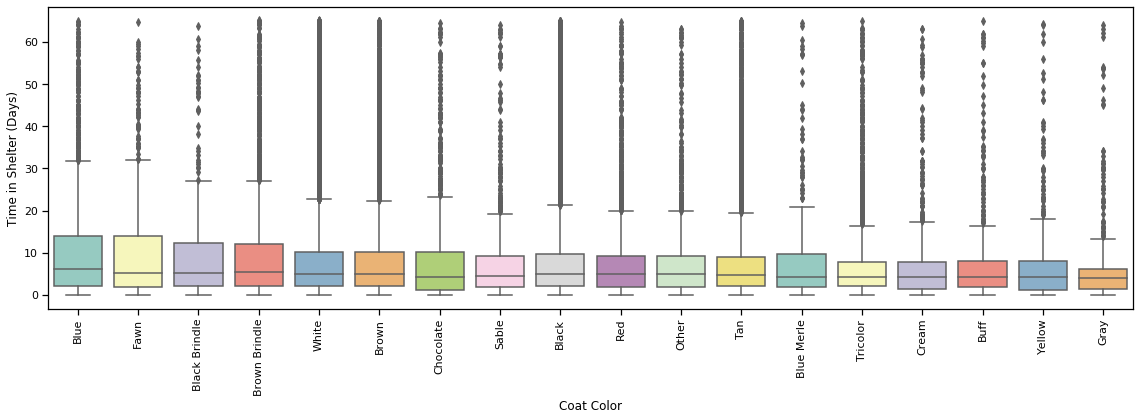

In [75]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='color_category', y='time_in_shelter_days', 
                    data=dog_coats, palette='Set3', order=sort_color)
plt.xlabel('Coat Color')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('color_box_normal.jpg', dpi=500)

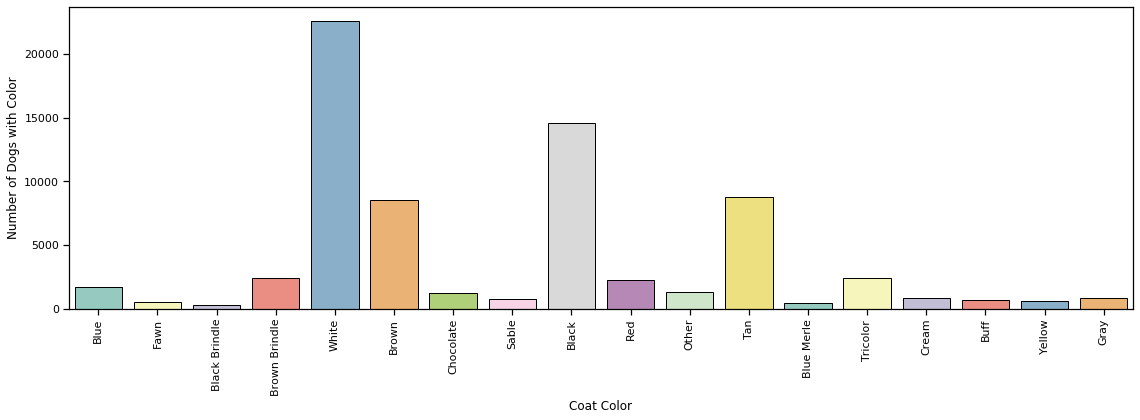

In [76]:
plt.figure(figsize=(16, 6))
sns.barplot(x=dog_coats.groupby('color_category').count().index, 
            y=dog_coats.groupby('color_category').count()['color'], 
            data=dog_coats.groupby('color_category').count(), palette='Set3', 
            order=sort_color, ec='black')
plt.xlabel('Coat Color')
plt.ylabel('Number of Dogs with Color')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('color_vol_normal.jpg', dpi=500)

In [77]:
color_list = dog_coats['color_category'].unique()
pval = ttest_all(color_list, dog_coats, 'color_category', 'time_in_shelter_days')
pval[pval['p-value']<0.05]

,Variable,Mean,Mean of Others,T-test Statistic,p-value
0,Other,8.227606,8.975726,-2.285402,2.229220e-02
1,Black,8.730628,9.021705,-2.648178,8.094497e-03
2,Black Brindle,10.779529,8.953867,2.673845,7.500439e-03
3,Blue,11.404227,8.900568,8.688094,3.762740e-18
6,Brown Brindle,10.754490,8.899288,7.520020,5.541284e-14
7,Buff,7.255448,8.977497,-3.697214,2.181438e-04
9,Cream,7.564577,8.978363,-3.435728,5.913039e-04
10,Fawn,11.238519,8.944105,4.493679,7.011400e-06
11,Gray,5.731094,8.999925,-7.908931,2.633419e-15
12,Red,8.332018,8.982081,-2.550088,1.077167e-02


In [78]:
coats_bootstrap = bootstrap_all(color_list, dog_coats, 'color_category', 'time_in_shelter_days')

100% |########################################################################|


In [79]:
coats_bootstrap[(coats_bootstrap['p-value_high']<0.05)|(coats_bootstrap['p-value_low']<0.05)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,Other,8.227606,8.975726,-0.748120,"[-1.3305208656988887, -0.1653048350016353]",0.9952,0.0048
1,Black,8.730628,9.021705,-0.291076,"[-0.4959952299653191, -0.07274884281511447]",0.9972,0.0028
2,Black Brindle,10.779529,8.953867,1.825662,"[0.31617136573530175, 3.4194065654002275]",0.0141,0.9859
3,Blue,11.404227,8.900568,2.503658,"[1.8338965068298654, 3.164167068487777]",0.0000,1.0000
5,Brown,9.194128,8.929840,0.264288,"[-0.011431533004280946, 0.5392010245186303]",0.0312,0.9688
6,Brown Brindle,10.754490,8.899288,1.855203,"[1.30961225525825, 2.414656497999434]",0.0000,1.0000
7,Buff,7.255448,8.977497,-1.722049,"[-2.4864911285052003, -0.9520319883827386]",1.0000,0.0000
9,Cream,7.564577,8.978363,-1.413786,"[-2.125797251100801, -0.6606519467238708]",1.0000,0.0000
10,Fawn,11.238519,8.944105,2.294413,"[1.126362096314959, 3.506345177790059]",0.0001,0.9999
11,Gray,5.731094,8.999925,-3.268831,"[-3.7956535704192627, -2.701643528315435]",1.0000,0.0000


#### Looking at all coat colors, we can see that the most notable differences are that blue, brown brindle, fawn, and white colored dogs have significantly longer adoption times, and buff, cream, gray, tan, tricolor, and yellow dogs have significantly shorter adoption times. Below, I look specifically at black dogs versus other color dogs.

In [80]:
black_dogs = dog_coats.loc[dog_coats['colored']=='Black']
other_dogs = dog_coats.loc[dog_coats['colored']!='Black']
bootstrap(black_dogs['time_in_shelter_days'], other_dogs['time_in_shelter_days'])

(-0.29107632505627556, array([-0.50446   , -0.07858308]), 0.996, 0.004)

In [81]:
stats.ttest_ind(black_dogs['time_in_shelter_days'], other_dogs['time_in_shelter_days'])

Ttest_indResult(statistic=-2.648177635470513, pvalue=0.008094497268416908)

In [82]:
black_dogs['time_in_shelter_days'].mean(), other_dogs['time_in_shelter_days'].mean()

(8.730628278738505, 9.021704603794781)

#### If we look specifically at black dogs versus other coat colors, we can see they have a slightly *shorter* adoption time. In most dogs, we don't see Black Dog Syndrome at this shelter.

## 1g. Does being multicolor versus single colored have an effect on adoption time?
Related to Black Dog Syndrome, we can look to see if potential dog parents are more likely to adopt dogs that are single or multicolor.

I hypothesize that single color dogs are more likely to be adopted quickly because they can more closely resemble purebred dogs.

<br>[Return to Table of Contents](#Analysis-Outline)

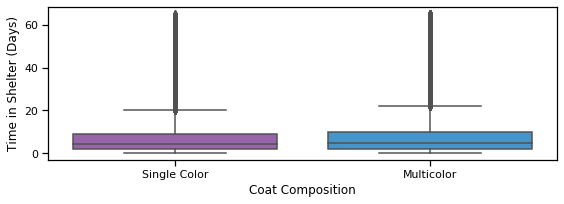

In [83]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
plt.figure(figsize=(8, 3))
sns.boxplot(x='multicolor', y='time_in_shelter_days',
                    data=dog_coats, palette=flatui)
plt.xlabel('Coat Composition')
plt.ylabel('Time in Shelter (Days)')
plt.tight_layout()
plt.savefig('multicolor_box_normal.jpg', dpi=500)

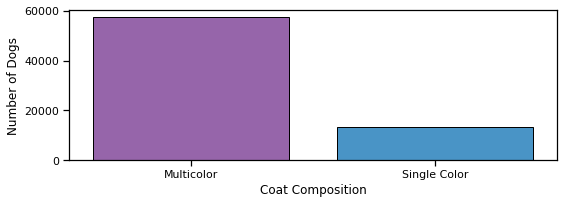

In [84]:
plt.figure(figsize=(8, 3))
sns.barplot(x=dog_coats.groupby('multicolor').count().index, 
            y=dog_coats.groupby('multicolor').count()['color'], 
            data=dog_coats.groupby('multicolor').count(), palette=flatui, 
            ec='black')
plt.xlabel('Coat Composition')
plt.ylabel('Number of Dogs')
plt.tight_layout()
plt.savefig('multicolor_vol_normal.jpg', dpi=500)

In [85]:
multicolor = dog_coats.loc[dog_coats['multicolor']=='Multicolor', 'time_in_shelter_days']
singlecolor = dog_coats.loc[dog_coats['multicolor']=='Single Color', 'time_in_shelter_days']
np.mean(multicolor), np.mean(singlecolor), stats.ttest_ind(multicolor, singlecolor)

(9.141465544736665,
 8.187955489651387,
 Ttest_indResult(statistic=8.3895179651344, pvalue=4.970152168158832e-17))

In [86]:
bootstrap(multicolor, singlecolor)

(0.9535100550852782, array([0.74270163, 1.16850695]), 0.0, 1.0)

#### Mulitcolor dogs have a significantly longer adoption time than single color dogs.

# 2. Long adoption times
This analysis looks only at animals with adoption times in the top 5th percentile of adoption times to attempt to determine patterns that make animals high-risk for having a long adoption time. Long adoption times are considered >71 days for most animals and >65 days for dogs specifically (the focus of most of the analysis).

## 2a. What animal types are most likely to spend an unusal amount of time in the shelter?
For this section, we look at animal types in the top 5th percentile of adoption times.
<br>[Return to Table of Contents](#Analysis-Outline)

In [87]:
df.time_in_shelter_days.quantile(0.95)

71.10902777777778

Text(0, 0.5, 'Time in Shelter (Days)')

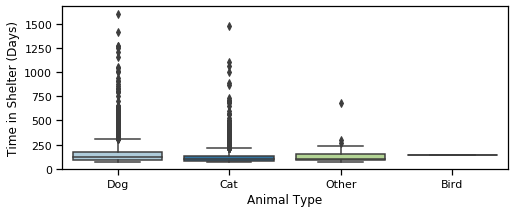

In [88]:
df_outliers = df.loc[df['time_in_shelter_days'] > (df.time_in_shelter_days.quantile(0.95)),:]

plt.figure(figsize=(8,3))
sns.boxplot(x='animal_type', y='time_in_shelter_days', palette='Paired', data=df_outliers)
plt.xlabel('Animal Type')
plt.ylabel('Time in Shelter (Days)')

There is still a long tail on the data, for dogs and cats especially.

Text(0, 0.5, 'Number of Animals')

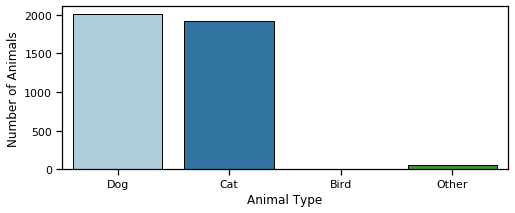

In [89]:
plt.figure(figsize=(8, 3))
sns.barplot(x=df_outliers.groupby('animal_type').count().index, 
            y=df_outliers.groupby('animal_type').count()['age_upon_outcome'], 
            data=df_outliers.groupby('animal_type').count(), palette='Paired', 
            ec='black', order=['Dog', 'Cat', 'Bird', 'Other'])
plt.xlabel('Animal Type')
plt.ylabel('Number of Animals')

In [90]:
animal_types_outlier = ['Dog', 'Cat', 'Bird', 'Other']
bootstrap_all(animal_types_outlier, df_outliers, 'animal_type', 'time_in_shelter_days')

100% |########################################################################|


,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,Dog,161.294692,124.494875,36.799818,"[29.61549163336671, 44.18668125770644]",0.0000,1.0000
1,Cat,124.267499,160.507760,-36.240262,"[-43.48068674781133, -29.20122799159533]",1.0000,0.0000
2,Bird,144.004861,143.042332,0.962529,"[-2.82312960725448, 4.552607906519373]",0.3114,0.6886
3,Other,132.077639,143.196066,-11.118427,"[-31.189874693662894, 16.032809546936015]",0.8138,0.1862


## 2b - 2g. Trends in adoption times for dogs with long adoption times
Here, we repeat the above analyses for dogs in the top 5th percentile of adoption times. For dogs, we set the outlier cutoff at 65 days.

In [91]:
dog_outliers_cutoff = df.loc[df['animal_type']=='Dog', 'time_in_shelter_days'].quantile(0.95)
dog_outliers_cutoff

65.10583333333332

In [92]:
dog_outliers = df[df['animal_type'] == 'Dog']
dog_outliers = dog_outliers[dog_outliers['time_in_shelter_days']>=dog_outliers_cutoff]

In [93]:
dog_outliers['breed'] = dog_outliers['breed'].str.replace('Black/Tan Hound', 'Black-Tan Hound')
dog_outliers['breed'] = dog_outliers['breed'].str.replace(' Shorthair', '')
dog_outliers['breed'] = dog_outliers['breed'].str.replace(' Longhair', '')
dog_outliers['breed_nomix'] = dog_outliers['breed'].str.replace(' Mix', '')
dog_outliers['breed_list'] = dog_outliers['breed_nomix'].str.split('/')
dog_outliers.loc[dog_outliers.breed_list.str.len()>1, 'mixed_breed'] = 'Mixed Breed'
dog_outliers.loc[dog_outliers['breed'].str.contains('Mix'), 'mixed_breed'] = 'Mixed Breed'
dog_outliers['mixed_breed'] = dog_outliers['mixed_breed'].fillna('Purebred')

has_breeds_outliers = pd.get_dummies(dog_outliers['breed_list'].apply(pd.Series).stack()).sum(level=0)

breeds_combined_outliers = pd.concat([dog_outliers, has_breeds_outliers], axis=1)

In [94]:
outlier_melt1 = breeds_combined_outliers[['breed_list', 'mixed_breed', 'time_in_shelter_days']]
outlier_melt2 = breeds_combined_outliers.loc[:, 'Akita':]
outlier_melt = pd.concat([outlier_melt1, outlier_melt2], axis=1)
breed_outliers = pd.melt(outlier_melt, id_vars=['breed_list','mixed_breed','time_in_shelter_days'], var_name='breed_name', value_name='has_breed')
breed_outliers.loc[breed_outliers['has_breed']==1, 'breed'] = breed_outliers['breed_name']
breed_outliers = breed_outliers.dropna()

## 2b. Are certain breeds more likely to have long adoption times?
As before, there are many cases where animals only appear once or a few times in the data. I again used the 25 most common breeds v. others.
<br>[Return to Table of Contents](#Analysis-Outline)

In [95]:
other_breeds_list_outliers = breed_outliers['breed'].value_counts().head(25).index.to_list()
other_breeds_list_outliers

['Pit Bull',
 'Labrador Retriever',
 'Chihuahua',
 'Australian Cattle Dog',
 'German Shepherd',
 'Boxer',
 'Catahoula',
 'Staffordshire',
 'American Bulldog',
 'Border Collie',
 'Pointer',
 'American Staffordshire Terrier',
 'American Pit Bull Terrier',
 'Australian Kelpie',
 'Plott Hound',
 'Jack Russell Terrier',
 'Rottweiler',
 'Beagle',
 'Chinese Sharpei',
 'Black Mouth Cur',
 'Dachshund',
 'Rat Terrier',
 'Australian Shepherd',
 'Siberian Husky',
 'Great Pyrenees']

In [96]:
breed_outliers.loc[~breed_outliers['breed'].isin(other_breeds_list_outliers), 'breed_category'] = 'Other'
breed_outliers.loc[breed_outliers['breed'].isin(other_breeds_list_outliers), 'breed_category'] = breed_outliers['breed']

In [97]:
sortgroup_outliers = breed_outliers.groupby('breed_category').mean().sort_values('time_in_shelter_days', ascending=False)
sortgroup_outliers = sortgroup_outliers['time_in_shelter_days'].to_dict()

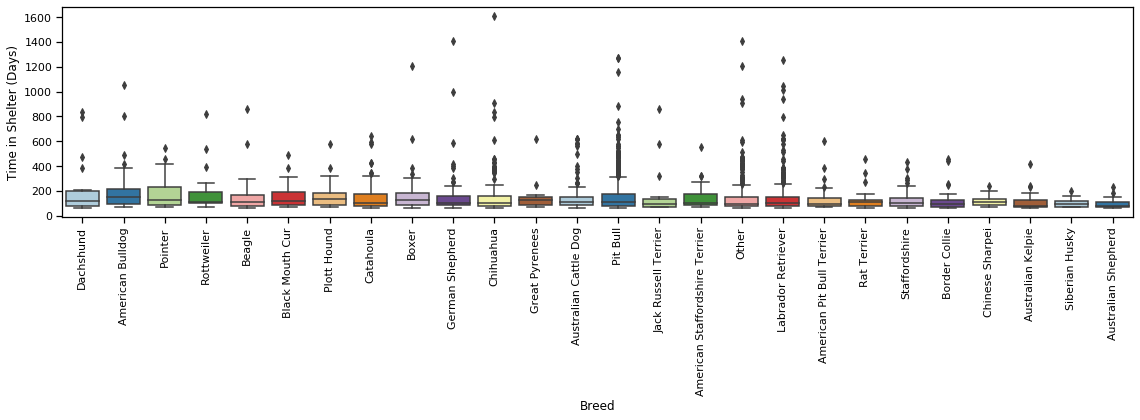

In [98]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='breed_category', y='time_in_shelter_days', 
                    data=breed_outliers, palette='Paired', order=sortgroup_outliers)
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('breed_box_outlier.jpg', dpi=500)

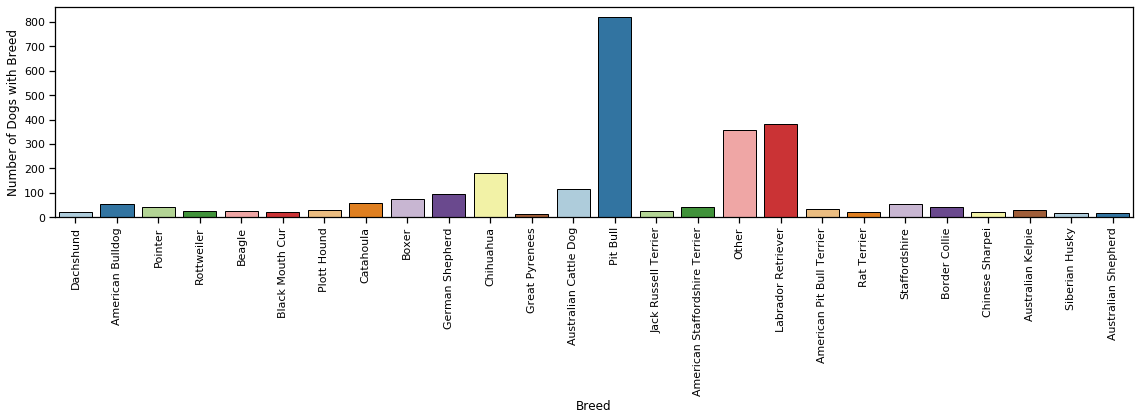

In [99]:
plt.figure(figsize=(16, 6))
sns.barplot(x=breed_outliers.groupby('breed_category').count().index, 
            y=breed_outliers.groupby('breed_category').count()['breed'], 
            data=breed_outliers.groupby('breed_category').count(), palette='Paired', 
            ec='black',order=sortgroup_outliers)
plt.xlabel('Breed')
plt.ylabel('Number of Dogs with Breed')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('breed_vol_outlier.jpg', dpi=500)

One notable trend here is that Pit Bulls are by far the most common dog in this outlier group.

In [100]:
outlier_breeds_list = breed_outliers['breed_category'].unique()
outlier_breed_bootstrap = bootstrap_all(outlier_breeds_list, breed_outliers, 'breed_category', 'time_in_shelter_days')

100% |########################################################################|


In [101]:
outlier_breed_bootstrap[outlier_breed_bootstrap['p-value_high']<0.05]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
1,American Bulldog,200.275773,150.105808,50.169965,"[7.664231228170626, 101.24491796184034]",0.027,0.973


**Bulldogs had the longest adoption times of this group; however, if we look at *probability*, there is a 1/3 chance that a dog in this extreme group will be a Pit Bull. Below, I complete a bootstrap with 10,000 replicates to demonstrate that this probability is replicable.**

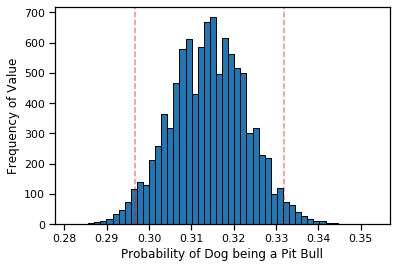

In [102]:
np.random.seed(47)
size = 10000
data = breed_outliers['breed']

# Observed probability
prob = len(breed_outliers[breed_outliers['breed']=='Pit Bull'])/len(breed_outliers)

# Initialize array of replicates: bs_replicates
bs_replicates = np.empty(size)

# Generate replicates
for i in range(size):
    sample = np.random.choice(data, size=len(data))
    bs_replicates[i] = len(sample[sample=='Pit Bull'])/len(sample)

conf_int = np.percentile(bs_replicates, [2.5, 97.5])

plt.hist(bs_replicates, bins=50, color='tab:blue', ec='black')
plt.axvline(conf_int[0], color='red', alpha=0.5, linestyle='--')
plt.axvline(conf_int[1], color='red', alpha=0.5, linestyle='--')
_ = plt.xlabel('Probability of Dog being a Pit Bull')
_ = plt.ylabel('Frequency of Value')

## 2c. Are there higher adoption times for certain breed groups? Are certain groups more highly represented in this long adoption subset?
<br>[Return to Table of Contents](#Analysis-Outline)

In [103]:
breed_groups_outliers = pd.merge(left=breed_outliers, right=dog_groups, left_on='breed', right_on='Breed')
breed_groups_outliers = breed_groups_outliers[breed_groups_outliers['American Kennel Club[4]'].isin(AKCgroups)]

In [104]:
sortbreedgroup_outliers = breed_groups_outliers.groupby('American Kennel Club[4]').mean().sort_values('time_in_shelter_days', ascending=False)
sortbreedgroup_outliers = sortbreedgroup_outliers['time_in_shelter_days'].to_dict()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

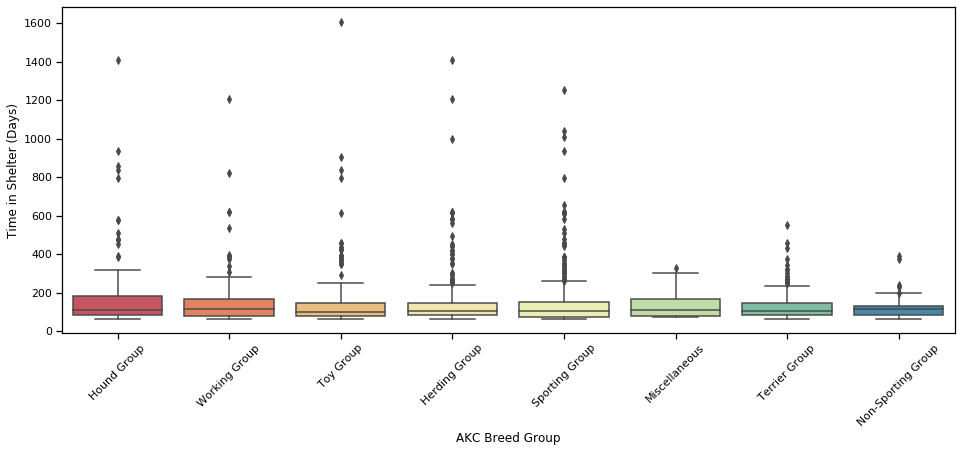

In [105]:
plt.figure(figsize=(16,6))
sns.boxplot(x='American Kennel Club[4]', y='time_in_shelter_days', 
            data=breed_groups_outliers, palette='Spectral', order=sortbreedgroup_outliers)
plt.xlabel('AKC Breed Group')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

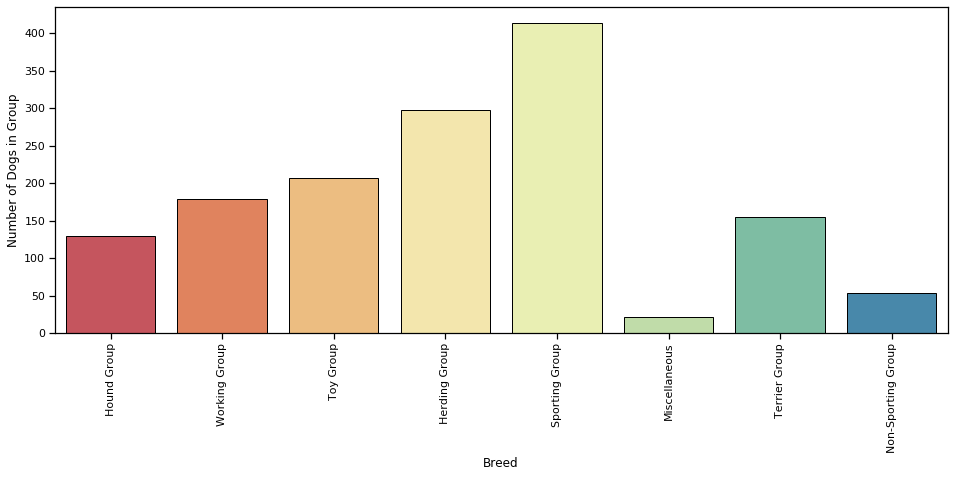

In [106]:
plt.figure(figsize=(16, 6))
sns.barplot(x=breed_groups_outliers.groupby('American Kennel Club[4]').count().index, 
            y=breed_groups_outliers.groupby('American Kennel Club[4]').count()['breed_name'], 
            data=breed_groups_outliers.groupby('American Kennel Club[4]').count(), palette='Spectral', 
            order=sortbreedgroup_outliers, ec='black')
plt.xlabel('Breed')
plt.ylabel('Number of Dogs in Group')
plt.xticks(rotation=90)

In [107]:
outlier_breed_groups_list = breed_groups_outliers['American Kennel Club[4]'].unique()

In [108]:
breed_group_bootstrap = bootstrap_all(outlier_breed_groups_list, breed_groups_outliers, 'American Kennel Club[4]', 'time_in_shelter_days')

100% |########################################################################|


In [109]:
breed_group_bootstrap[(breed_group_bootstrap['p-value_high']<0.05)|(breed_group_bootstrap['p-value_low']<0.05)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,Terrier Group,130.696116,150.199449,-19.503334,"[-33.82900885863919, -3.9433703297057052]",0.9962,0.0038
3,Hound Group,179.846405,145.013083,34.833321,"[3.0623348782889086, 71.30849353999079]",0.0323,0.9677
4,Non-Sporting Group,124.095283,149.030885,-24.935602,"[-42.07074159978021, -5.22718205088191]",0.9983,0.0017


#### We can see that the terrier group and non-sporting group have significantly shorter adoption times than other groups in this extreme group, and the hound group has a (slightly) significantly longer adoption time.

## 2d. Is there an effect of being mixed breed or purebred on adoption times in dogs with long adoption times?
<br>[Return to Table of Contents](#Analysis-Outline)

Text(0, 0.5, 'Time in Shelter (Days)')

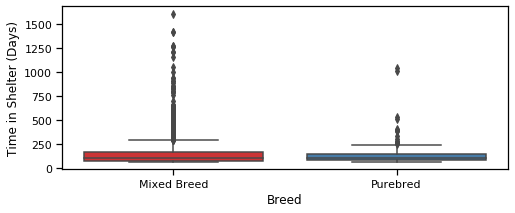

In [110]:
plt.figure(figsize=(8,3))
sns.boxplot(x='mixed_breed', y='time_in_shelter_days', 
                    data=breed_outliers, palette='Set1')
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')

Text(0, 0.5, 'Number of Dogs in Group')

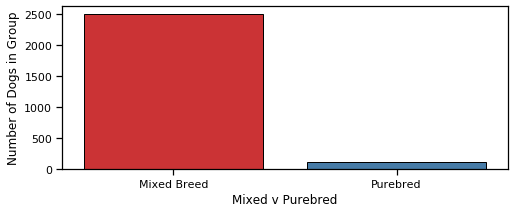

In [111]:
plt.figure(figsize=(8, 3))
sns.barplot(x=breed_outliers.groupby('mixed_breed').count().index, 
            y=breed_outliers.groupby('mixed_breed').count()['breed_name'], 
            data=breed_outliers.groupby('mixed_breed').count(), palette='Set1', 
            ec='black')
plt.xlabel('Mixed v Purebred')
plt.ylabel('Number of Dogs in Group')

In [112]:
mixed_breed_outliers = breed_outliers.loc[breed_outliers['mixed_breed']=='Mixed Breed', 'time_in_shelter_days']
purebreed_outliers =  breed_outliers.loc[breed_outliers['mixed_breed']=='Purebred', 'time_in_shelter_days']

In [113]:
bootstrap(mixed_breed_outliers, purebreed_outliers)

(2.56767388323928, array([-27.48585981,  26.2997414 ]), 0.4477, 0.5523)

While mixed breed dogs are far more common in this group, they do not have significantly longer adoption times.

## 2e. Is there an effect of age on longer adoption times?
<br>[Return to Table of Contents](#Analysis-Outline)

In [114]:
dog_outliers['age_group'] = dog_outliers['age_upon_outcome_age_group'].str[1:-1]
dog_outliers['age_group'] = dog_outliers['age_group'].str.replace(', ','-')

Text(0, 0.5, 'Time in Shelter (Days)')

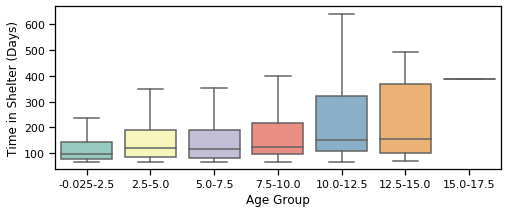

In [115]:
plt.figure(figsize=(8,3))
sns.boxplot(x='age_group', y='time_in_shelter_days', 
            data=dog_outliers, palette='Set3', 
            showfliers=False, order=['-0.025-2.5', '2.5-5.0', '5.0-7.5', 
                                     '7.5-10.0', '10.0-12.5', '12.5-15.0',
                                    '15.0-17.5'])
plt.xlabel('Age Group')
plt.ylabel('Time in Shelter (Days)')

Text(0, 0.5, 'Number of Dogs in Group')

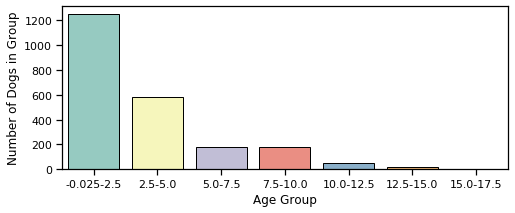

In [116]:
plt.figure(figsize=(8, 3))
sns.barplot(x=dog_outliers.groupby('age_group').count().index, 
            y=dog_outliers.groupby('age_group').count()['age_upon_outcome'], 
            data=dog_outliers.groupby('age_group').count(), palette='Set3', 
            ec='black', order=['-0.025-2.5', '2.5-5.0', '5.0-7.5',
                               '7.5-10.0', '10.0-12.5', '12.5-15.0',
                               '15.0-17.5'])
plt.xlabel('Age Group')
plt.ylabel('Number of Dogs in Group')

In [117]:
age_groups = ['-0.025-2.5', '2.5-5.0', '5.0-7.5',
              '7.5-10.0', '10.0-12.5', '12.5-15.0', '15.0-17.5']
age_groups_outlier_bootstrap = bootstrap_all(age_groups, dog_outliers, 'age_group', 'time_in_shelter_days')

100% |########################################################################|


In [118]:
age_groups_outlier_bootstrap[(age_groups_outlier_bootstrap['p-value_high']<0.5)|(age_groups_outlier_bootstrap['p-value_low']<0.5)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,-0.025-2.5,127.059345,179.340344,-52.280999,"[-63.598355175030534, -40.94525906494531]",1.0000,0.0000
1,2.5-5.0,176.240507,141.641078,34.599429,"[20.44911840685222, 50.09057428415771]",0.0000,1.0000
2,5.0-7.5,152.083202,150.430491,1.652711,"[-13.425550461540908, 17.95263180394695]",0.4102,0.5898
3,7.5-10.0,190.881805,147.108339,43.773465,"[20.548374184963812, 70.02940173200878]",0.0005,0.9995
4,10.0-12.5,250.258595,148.177151,102.081444,"[46.84953100683685, 164.4695416808869]",0.0010,0.9990
5,12.5-15.0,210.492614,149.974826,60.517787,"[6.4355904884964374, 116.86836873968883]",0.0200,0.9800
6,15.0-17.5,389.091667,150.456429,238.635238,"[232.97442801722016, 243.95001233955506]",0.0000,1.0000


#### In dogs that have longer adoption times, younger dogs have significantly shorter adoption times, while dogs 2.5-5 years old and senior-aged dogs (aged 15+) have significantly longer adoption times. 

## 2f. Is Black Dog Syndrome more prevalent in dogs with long adoption times?
As before, I parsed mixed coat colors to look at individual colors separately.
<br>[Return to Table of Contents](#Analysis-Outline)

In [119]:
dog_outliers['coat_color_list'] = dog_outliers['color'].str.split('/')
dog_outliers.loc[dog_outliers.coat_color_list.str.len()>1, 'multicolor'] = 'Multicolor'
dog_outliers.loc[dog_outliers['color'].str.contains('Tricolor'), 'multicolor'] = 'Multicolor'
dog_outliers['multicolor'] = dog_outliers['multicolor'].fillna('Single Color')
coat_colors_outliers = pd.get_dummies(dog_outliers['coat_color_list'].apply(pd.Series).stack()).sum(level=0)

In [120]:
coat_colors_combined_outliers = pd.concat([dog_outliers, coat_colors_outliers], axis=1)

In [121]:
coat1_outliers = coat_colors_combined_outliers[['color', 'coat_color_list', 'multicolor', 'time_in_shelter_days']]
coat2_outliers = coat_colors_combined_outliers.loc[:, 'Apricot':]
coat_melt_outliers = pd.concat([coat1_outliers, coat2_outliers], axis=1)
dog_coats_outliers = pd.melt(coat_melt_outliers, id_vars=['color', 'coat_color_list', 'multicolor','time_in_shelter_days'], 
                       var_name='coat_color', value_name='has_color')
dog_coats_outliers.loc[dog_coats_outliers['has_color']==1, 'colored'] = dog_coats_outliers['coat_color']
dog_coats_outliers = dog_coats_outliers.dropna()

Similarly to breed in this outlier group, I used quartiles to determine how to group "other" colors (less frequently occuring colors).

In [122]:
common_colors_outliers = dog_coats_outliers.groupby('colored').count()
common_colors_outliers = common_colors_outliers.sort_values('has_color', ascending=False)
other_colors_outliers = common_colors_outliers.loc[common_colors_outliers['has_color']<60,:]
other_colors_list_outliers = other_colors_outliers.index.tolist()

In [123]:
dog_coats_outliers.loc[dog_coats_outliers['colored'].isin(other_colors_list_outliers), 'color_category'] = 'Other'
dog_coats_outliers.loc[~dog_coats_outliers['colored'].isin(other_colors_list_outliers), 'color_category'] = dog_coats_outliers['colored']

In [124]:
sort_color_outliers = dog_coats_outliers.groupby('color_category').mean().sort_values('time_in_shelter_days', ascending=False)
sort_color_outliers = sort_color_outliers['time_in_shelter_days'].to_dict()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

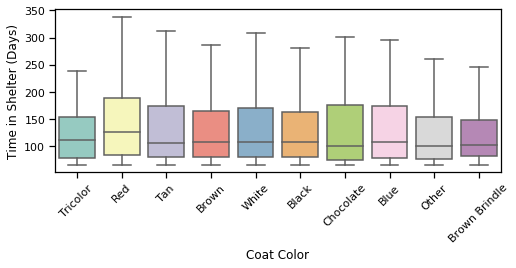

In [125]:
plt.figure(figsize=(8,3))
sns.boxplot(x='color_category', y='time_in_shelter_days',
                    data=dog_coats_outliers, palette='Set3', showfliers=False, order=sort_color_outliers)
plt.xlabel('Coat Color')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

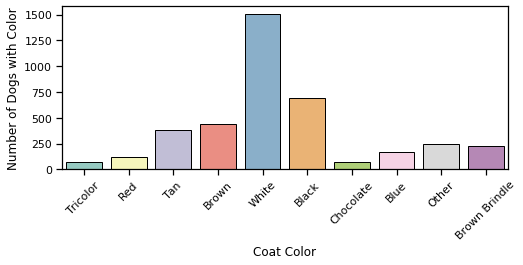

In [126]:
plt.figure(figsize=(8, 3))
sns.barplot(x=dog_coats_outliers.groupby('color_category').count().index, 
            y=dog_coats_outliers.groupby('color_category').count()['color'], 
            data=dog_coats_outliers.groupby('color_category').count(), palette='Set3', 
            order=sort_color_outliers, ec='black')
plt.xlabel('Coat Color')
plt.ylabel('Number of Dogs with Color')
plt.xticks(rotation=45)

In [127]:
color_list_outliers = dog_coats_outliers['color_category'].unique()
coats_outliers_bootstrap = bootstrap_all(color_list_outliers, dog_coats_outliers, 'color_category', 'time_in_shelter_days')

100% |########################################################################|


In [128]:
coats_outliers_bootstrap[(coats_outliers_bootstrap['p-value_high']<0.05)|(coats_outliers_bootstrap['p-value_low']<0.05)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
4,Brown Brindle,136.535466,151.562919,-15.027453,"[-27.366030627323113, -1.843087858093765]",0.9919,0.0081


Looking at all coat colors, we can see that the only coat color with a significant effect is Brown Brindle, which has a significantly shorter adoption time. This is particularly interesting since this coat color had a *longer* adoption time in most dogs.

In [129]:
black_dogs_outliers = dog_coats_outliers.loc[dog_coats_outliers['colored']=='Black', 'time_in_shelter_days']
other_dogs_outliers = dog_coats_outliers.loc[dog_coats_outliers['colored']!='Black', 'time_in_shelter_days']
bootstrap(black_dogs_outliers, other_dogs_outliers)

(-2.261618003636869, array([-13.14680138,   8.79037398]), 0.6588, 0.3412)

In [130]:
stats.ttest_ind(black_dogs_outliers, other_dogs_outliers)

Ttest_indResult(statistic=-0.40733489331897343, pvalue=0.6837842970790134)

In [131]:
black_dogs_outliers.mean(), other_dogs_outliers.mean()

(148.8461289482124, 151.10774695184926)

Again, we see no effect of black coat on adoption times.

## 2g. Having a single color vs. multicolor coat also does not affect adoption time in dogs with long adoption times.
<br>[Return to Table of Contents](#Analysis-Outline)

Text(0, 0.5, 'Time in Shelter (Days)')

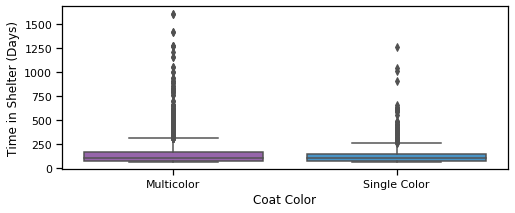

In [132]:
plt.figure(figsize=(8,3))
sns.boxplot(x='multicolor', y='time_in_shelter_days',
                    data=dog_coats_outliers, palette=flatui)
plt.xlabel('Coat Color')
plt.ylabel('Time in Shelter (Days)')

Text(0, 0.5, 'Number of Dogs')

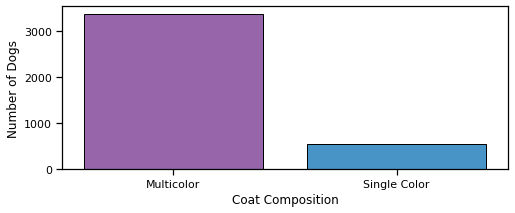

In [133]:
plt.figure(figsize=(8, 3))
sns.barplot(x=dog_coats_outliers.groupby('multicolor').count().index, 
            y=dog_coats_outliers.groupby('multicolor').count()['color'], 
            data=dog_coats_outliers.groupby('multicolor').count(), palette=flatui, 
            ec='black')
plt.xlabel('Coat Composition')
plt.ylabel('Number of Dogs')

In [134]:
multicolor_outliers = dog_coats_outliers.loc[dog_coats_outliers['multicolor']=='Multicolor', 'time_in_shelter_days']
singlecolor_outliers = dog_coats_outliers.loc[dog_coats_outliers['multicolor']=='Single Color', 'time_in_shelter_days']
np.mean(multicolor_outliers), np.mean(singlecolor_outliers), stats.ttest_ind(multicolor_outliers, singlecolor_outliers)

(151.6211732293213,
 145.16012835940634,
 Ttest_indResult(statistic=1.062764757038252, pvalue=0.28795416133056406))

In [135]:
bootstrap(multicolor_outliers, singlecolor_outliers)

(6.461044869914957, array([-5.27390059, 17.6518485 ]), 0.1347, 0.8653)

There is no significant effect of multicolor v. single color coats in dogs with long adoption times.

*** 
# 3. What times are pets most likely to be adopted?

In [136]:
times = df.set_index('outcome_datetime')
times = times.sort_index()
times['adoption_count'] = 1
all_times = times['adoption_count']

In [137]:
cat_times = times.loc[times['animal_type']=='Cat', 'adoption_count']
dog_times = times.loc[times['animal_type']=='Dog', 'adoption_count']

## 3a. Adoption Trends by Season
Here, I've examined whether pets are more likely to be adopted in certain seasons.
<br>[Return to Table of Contents](#Analysis-Outline)

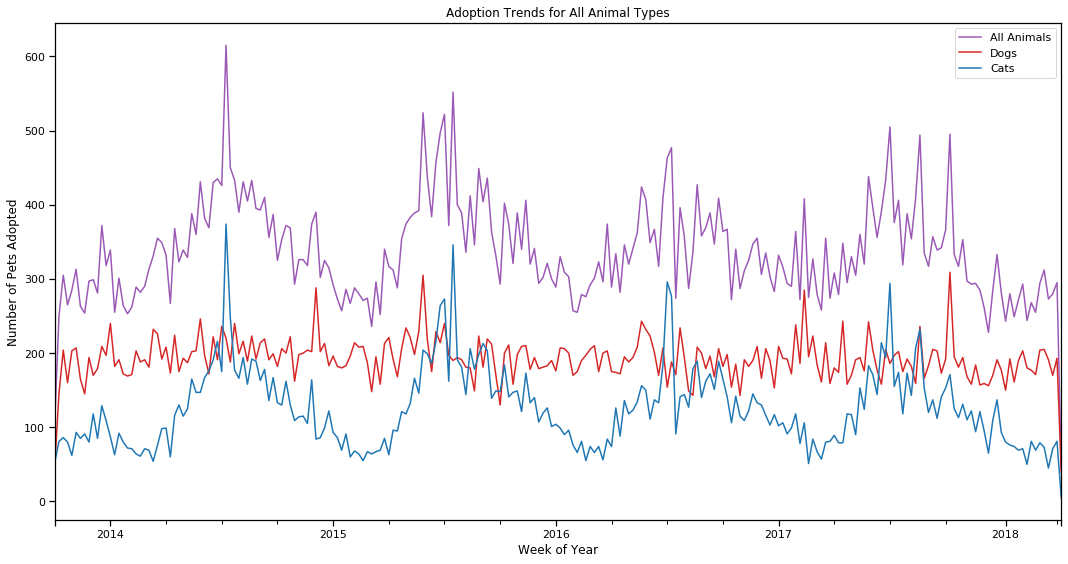

In [138]:
plt.figure(figsize=(15,8))
all_times.resample('1W').count().plot()
dog_times.resample('1W').count().plot(color='tab:red')
cat_times.resample('1W').count().plot(color='tab:blue')
plt.title('Adoption Trends for All Animal Types')
plt.xlabel('Week of Year')
plt.ylabel('Number of Pets Adopted')
plt.legend(['All Animals', 'Dogs', 'Cats'])
plt.tight_layout()
plt.savefig('seasonal_adoption_trends.jpg', dpi=500)

#### Interestingly, dogs do not have a notable pattern throughout the year for adoption times, but we see a large spike in adoptions for cats in the summer.

## 3b. Adoption Trends by Time of Day
I examined whether certain times of the day have higher average adoption rates here for all animals, cats, and dogs.
<br>[Return to Table of Contents](#Analysis-Outline)

In [139]:
perhour = all_times.groupby([all_times.index.date, all_times.index.hour]).sum()
perhour = perhour.reset_index()
perhour = perhour.groupby('outcome_datetime').mean()

perhour_dogs = dog_times.groupby([dog_times.index.date, dog_times.index.hour]).sum()
perhour_dogs = perhour_dogs.reset_index()
perhour_dogs = perhour_dogs.groupby('outcome_datetime').mean()

perhour_cats = cat_times.groupby([cat_times.index.date, cat_times.index.hour]).sum()
perhour_cats = perhour_cats.reset_index()
perhour_cats = perhour_cats.groupby('outcome_datetime').mean()

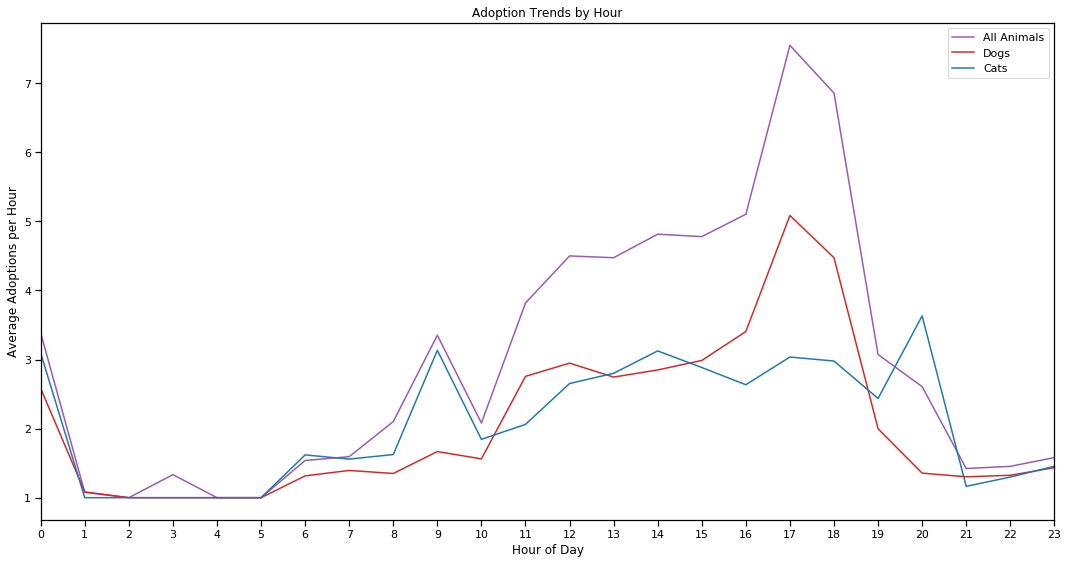

In [140]:
plt.figure(figsize=(15,8))
plt.plot(perhour)
plt.plot(perhour_dogs, color='tab:red')
plt.plot(perhour_cats, color='tab:blue')
plt.title('Adoption Trends by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Adoptions per Hour')
plt.legend(['All Animals', 'Dogs', 'Cats'])
plt.xticks(np.arange(0,25))
plt.xlim(0,23)
plt.tight_layout()
plt.savefig('daily_adoption_trends.jpg', dpi=500)

#### Dogs have higher adoption times flanking the standard work day, between 8-10 AM and 4-6 PM. Cats have fairly flat adoption times throughout the day.

## 3c. Adoption Times by Day of Week
<br>[Return to Table of Contents](#Analysis-Outline)

In [141]:
weekdays = all_times.reset_index()
weekdays['day_of_week'] = weekdays['outcome_datetime'].dt.weekday_name
weekdays = weekdays.groupby([weekdays.outcome_datetime.dt.date,weekdays.day_of_week]).sum()
weekdays = weekdays.reset_index()

In [142]:
weekday_list = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

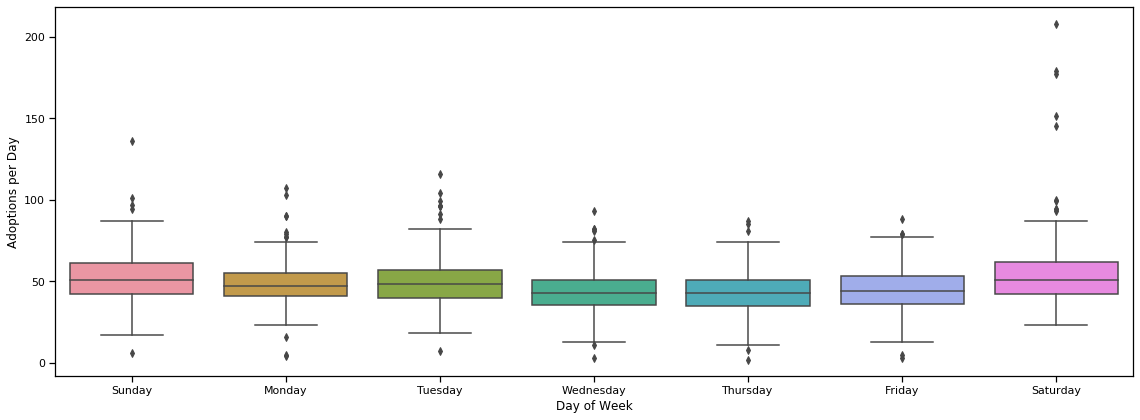

In [143]:
plt.figure(figsize=(16,6))
sns.boxplot(x=weekdays.day_of_week, 
            y=weekdays.adoption_count, order=weekday_list)
plt.xlabel('Day of Week')
plt.ylabel('Adoptions per Day')
plt.tight_layout()
plt.savefig('weekly_adoption_trends_box.jpg', dpi=500)

In [144]:
weekdays_sum = weekdays.groupby('day_of_week').sum()

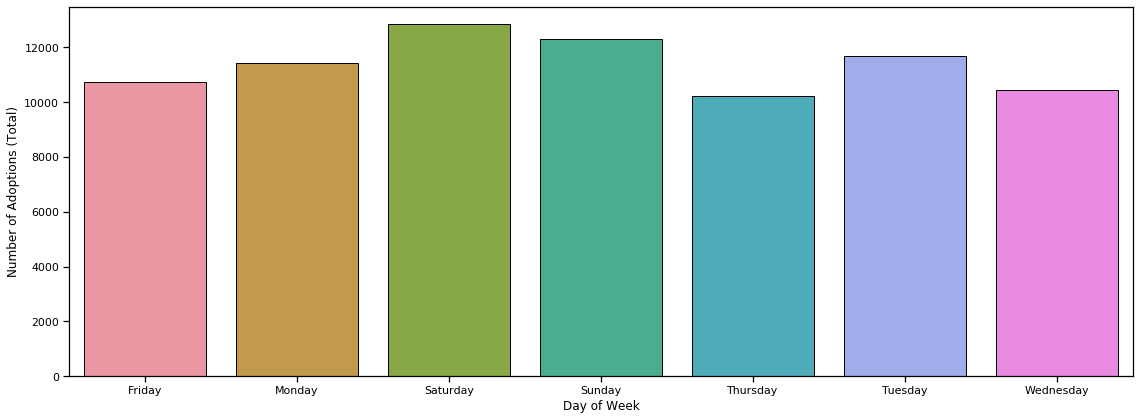

In [145]:
plt.figure(figsize=(16,6))
sns.barplot(x=weekdays_sum.index, 
            y=weekdays_sum.adoption_count, 
            ec='black')
plt.xlabel('Day of Week')
plt.ylabel('Number of Adoptions (Total)')
plt.tight_layout()
plt.savefig('weekly_adoption_trends_vol.jpg', dpi=500)

In [146]:
weekday_bootstrap = bootstrap_all(weekday_list, weekdays, 'day_of_week', 'adoption_count')

100% |########################################################################|


In [147]:
weekday_bootstrap

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,Sunday,52.391489,47.739192,4.652297,"[2.492840297359653, 6.79359357329192]",0.0000,1.0000
1,Monday,48.634043,48.364989,0.269053,"[-1.6734771627184595, 2.2835105629024226]",0.3914,0.6086
2,Tuesday,49.533898,48.214184,1.319714,"[-0.7534174780622646, 3.50601048803943]",0.1085,0.8915
3,Wednesday,44.493617,49.054571,-4.560954,"[-6.416014747349847, -2.7126840779890506]",1.0000,0.0000
4,Thursday,43.476596,49.223955,-5.747359,"[-7.658501892425775, -3.8791288055853004]",1.0000,0.0000
5,Friday,45.680851,48.856839,-3.175988,"[-5.088364069544768, -1.3462369377384393]",0.9997,0.0003
6,Saturday,54.608511,47.369950,7.238560,"[4.369534885474313, 10.414630486903805]",0.0000,1.0000


#### Sunday and Saturday have significantly higher adoption rates than the other weekdays, and Wednesday through Friday have signifcantly lower adoption rates.

# 4. Predict time in shelter

I develop a model to predict shelter times for dogs using data that is available at animal intake. I then create a tool to quickly output these predicted times that could be used at animal intake.

## Data Preparation
Below, I prepare the following data for inclusion in the model:
1. [Breed](#1.-Breed,-2.-Mixed-Breed) (note that ultimately, only the following breeds were shown to be significant and used in the model):
2. [Purebreed v. mixed breed](#1.-Breed,-2.-Mixed-Breed)
3. [Intake condition](#3.-Intake-Condition)
4. [Intake type](#4.-Intake-Type)
5. [Intake sex](#5.-Intake-Sex)
6. [Coat color](#6.-Coat-color,-7.-Multicolor)
7. [Multicolor v. single color coat](#6.-Coat-color,-7.-Multicolor)
8. Age at intake*

**No transformation required; however, depsite being presented as age in days, this column appears to be determined by age in years * 365 to generate a loose estimate of age in days.*

## Quick Links
- [Ordinary Least Squares](#Ordinary-Least-Squares)
- [Lasso](#Lasso)
- [Ridge Regression](#Ridge-Regression)
- [Support Vector Regression (SVR)](#Support-Vector-Regression-(SVR))
- [Ensemble Methods](#Ensemble-Methods)
- [Model Testing](#Model-Testing)

[Return to Table of Contents](#Analysis-Outline)

In [148]:
df.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

In [149]:
# select df variables we want - dogs only
model_data = df[df['animal_type']=='Dog']
model_data = model_data[['time_in_shelter_days', 'age_upon_intake_(days)', 'breed', 
                         'intake_condition', 'intake_type', 'color', 'sex_upon_intake']]
#'intake_datetime', 
model_data.head()

,time_in_shelter_days,age_upon_intake_(days),breed,intake_condition,intake_type,color,sex_upon_intake
0,0.588194,3650,Spinone Italiano Mix,Normal,Stray,Yellow/White,Neutered Male
1,1.259722,2555,Spinone Italiano Mix,Normal,Public Assist,Yellow/White,Neutered Male
2,1.113889,2190,Spinone Italiano Mix,Normal,Public Assist,Yellow/White,Neutered Male
3,4.970139,3650,Dachshund,Normal,Owner Surrender,Tricolor,Neutered Male
4,0.119444,5840,Shetland Sheepdog,Injured,Public Assist,Brown/White,Neutered Male


#### 1. Breed, 2. Mixed Breed
1. Convert categorical data to boolean columns for breed (1 = has breed, 0 = does not have breed)
2. Collect data on mixed breed v. purebreed

In [150]:
# clean up breed names in regular model_data
model_data['breed_clean'] = model_data['breed'].str.replace('Black/Tan Hound', 'Black-Tan Hound')
model_data['breed_clean'] = model_data['breed_clean'].str.replace('Unknown', 'Unknown Breed')
model_data['breed_clean'] = model_data['breed_clean'].str.replace('Dachshund Stan', 'Dachshund')
model_data['breed_clean'] = model_data['breed_clean'].str.replace('Dachshund Wirehair', 'Dachshund')

# remove 'mix'
model_data['breed_list'] = model_data['breed_clean'].str.replace(' Mix', '')
model_data['breed_list'] = model_data['breed_list'].str.split('/')

# add a column that specifies mixed breed v. purebreed 
model_data.loc[model_data.breed_list.str.len()>1, 'mixed_breed'] = 1
model_data.loc[model_data['breed_clean'].str.contains('Mix'), 'mixed_breed'] = 1
model_data['mixed_breed'] = model_data['mixed_breed'].fillna(0)

# get dummies for breed
breed_dummies = pd.get_dummies(model_data['breed_list'].apply(pd.Series).stack()).sum(level=0)

# combine dummies data with the rest of the data
model_data = pd.concat([model_data, breed_dummies], axis=1).drop(columns=['breed', 'breed_clean', 'breed_list']).dropna()

#### 3. Intake Condition
The recorded condition of the animal at the time it entered the shelter. Options include: 
1. Convert categorical data to boolean columns

In [151]:
# get dummies for intake condition
conditions_dummies = pd.get_dummies(model_data['intake_condition'].apply(pd.Series).stack()).sum(level=0)
model_data = pd.concat([model_data, conditions_dummies], axis=1).drop(columns='intake_condition').dropna()

#### 4. Intake Type
The intake type recorded at time of intake for the animal. Options include: 
1. Convert categorical data to boolean columns

In [152]:
# get dummies for intake type
type_dummies = pd.get_dummies(model_data['intake_type'].apply(pd.Series).stack()).sum(level=0)
model_data = pd.concat([model_data, type_dummies], axis=1).drop(columns='intake_type').dropna()

#### 5. Intake Sex

In [153]:
# get dummies for intake sex
intake_sex = pd.get_dummies(model_data['sex_upon_intake'].apply(pd.Series).stack()).sum(level=0)
model_data = pd.concat([model_data, intake_sex], axis=1).drop(columns='sex_upon_intake').dropna()

#### 6. Coat color, 7. Multicolor
1. Convert categorical data to boolean columns for coat color
2. Create a boolean column for coat being multicolored or single colored.

In [154]:
# clean up data for coat colors
model_data['color_list'] = model_data['color'].str.split('/')
model_data.loc[model_data.color_list.str.len()>1, 'multicolor'] = 1
model_data.loc[model_data['color'].str.contains('Tricolor'), 'multicolor'] = 1
model_data['multicolor'] = model_data['multicolor'].fillna(0)

# get dummies for coat color
coat_dummies = pd.get_dummies(model_data['color_list'].apply(pd.Series).stack()).sum(level=0)

# combine dummies data with the rest of the data
model_data = pd.concat([model_data, coat_dummies], axis=1).drop(columns=['color', 'color_list']).dropna()

#### Convert time in shelter days to log scale
Since time in shelter days is exponentially distributed, convert to a log scale.

In [155]:
# use the log of time in shelter days
model_data['time_in_shelter_days_log'] = np.log(model_data['time_in_shelter_days'])
model_data['time_in_shelter_days_log'] = model_data['time_in_shelter_days_log'].replace([np.inf, -np.inf], np.nan)

In [156]:
model_data.head()

,time_in_shelter_days,age_upon_intake_(days),mixed_breed,Affenpinscher,Afghan Hound,Airedale Terrier,Akbash,Akita,Alaskan Husky,Alaskan Malamute,...,Ruddy,Sable,Silver,Tan,Tortie,Tricolor,White,Yellow,Yellow Brindle,time_in_shelter_days_log
0,0.588194,3650,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,-0.530698
1,1.259722,2555,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0.230891
2,1.113889,2190,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0.107857
3,4.970139,3650,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.603448
4,0.119444,5840,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.124904


## Linear Regression
I attempted several models for linear regression:
- [Ordinary Least Squares](#Ordinary-Least-Squares)
- [Ridge Regression](#Ridge-Regression)

### Assumptions
- Assume that the regressors are not correlated. It is entirely possible this is not the case for these data, e.g., intake condition may be often associated with a certain breed.

[Return to Predict Time in Shelter](#4.-Predict-time-in-shelter)<br>
[Return to Table of Contents](#Analysis-Outline)

In [157]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Ordinary Least Squares
Here, a linear regression using Ordinary Least Squares is used to develop a model to predict shelter times. This method was only moderately effective, and the initial model performed extremely poorly.

1. [Feature Selection](#OLS-Feature-Selection)

**[OLS Model](#OLS-Final-Model)**

[Return to Linear Regression](#Linear-Regression)<br>
[Return to Table of Contents](#Analysis-Outline)

In [158]:
model_data = model_data.dropna()

In [159]:
y = model_data['time_in_shelter_days_log']
X = model_data.drop(columns=['time_in_shelter_days_log', 'time_in_shelter_days'])

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = model.predict(X_test)

# Compute R^2
print("R^2: {:.2f}%".format(model.score(X_test, y_test)*100))

# Compute root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.3f}".format(rmse))

# Perform cross-validation and calculate r^2 for each
print('Cross-Validation R^2 Scores: ', end=''), [print('{:.2f}%'.format(i*100), end=' ') for i in list(cross_val_score(model, X, y, cv=5))];

R^2: -2690409996.46%
Root Mean Squared Error: 9323.341
Cross-Validation R^2 Scores: -283602010361.27% -29015995371635.26% 10.63% -25878.99% 4.41% 

### OLS Feature Selection
#### Top Correlated Features
For feature selection, I searched for the model that would explain the most variance in the data (highest $R^2$). I examined root mean squared error as well (standard deviation of the residuals) to select the optimal model.

First, I examined the top correlated variables to see if $R^{2}$ will improve. I looped through all possible numbers n of top correlated variables and determined that **the highest $R^2$ value, 10.67% was obtained with the top 114 correlated features**. The root mean squared error was relatively high, at ~1.7; however, this model could still be useful in getting a general estimate of shelter time for a given dog.

In [160]:
# generate correlations
model_data_corr = model_data.corr()

In [161]:
top = {}
pbar = ProgressBar()
for i in pbar(range(1, len(model_data_corr.drop(columns=['time_in_shelter_days', 'time_in_shelter_days_log']))+1)):
    top_i = np.abs(model_data_corr['time_in_shelter_days_log']).drop(['time_in_shelter_days', 'time_in_shelter_days_log']).sort_values(ascending=False).head(i)
    top_i = top_i.index.to_list()
    
    X = model_data[top_i]
    y = model_data['time_in_shelter_days_log']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    top[i] = model.score(X_test, y_test)

100% |########################################################################|


In [162]:
optimal_number = 0
optimal_r2 = 0
for key, value in top.items():
    if value > optimal_r2:
        optimal_number = key
        optimal_r2 = value
optimal_number, optimal_r2

(114, 0.10683978569665264)

In [163]:
top_feats = np.abs(model_data_corr['time_in_shelter_days_log']).drop(['time_in_shelter_days', 'time_in_shelter_days_log']).sort_values(ascending=False).head(optimal_number)
top_feats = top_feats.index.to_list()

X = model_data[top_feats]
y = model_data['time_in_shelter_days_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R^2: {:.2f}%".format(model.score(X_test, y_test)*100))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.3f}".format(rmse))
print('Cross-Validation R^2 Scores: ', end=''), [print('{:.2f}%'.format(i*100), end=' ') for i in list(cross_val_score(model, X, y, cv=5))];

R^2: 10.68%
Root Mean Squared Error: 1.699
Cross-Validation R^2 Scores: 9.58% 11.02% 11.13% 7.14% 4.63% 

I also examined all variables, as I did initally, but *ordered*. Here, I discovered that order of features is important in scikit-learn's linear regression function. It appears that statsmodels does not change as a result of the feature order.

In [164]:
all_cols = np.abs(model_data_corr['time_in_shelter_days_log']).drop(['time_in_shelter_days', 'time_in_shelter_days_log']).sort_values(ascending=False)
all_cols = all_cols.index.to_list()

X = model_data[all_cols]
y = model_data['time_in_shelter_days_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R^2: {:.2f}%".format(model.score(X_test, y_test)*100))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.3f}".format(rmse))
print('Cross-Validation R^2 Scores: ', end=''), [print('{:.2f}%'.format(i*100), end=' ') for i in list(cross_val_score(model, X, y, cv=5))];

R^2: 10.38%
Root Mean Squared Error: 1.702
Cross-Validation R^2 Scores: 9.08% 10.52% 10.81% 6.77% 4.41% 

Linear regression using statsmodels with unordered features

In [165]:
y = model_data['time_in_shelter_days_log']
X = model_data.drop(columns=['time_in_shelter_days_log', 'time_in_shelter_days'])
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     time_in_shelter_days_log   R-squared:                       0.110
Model:                                  OLS   Adj. R-squared:                  0.105
Method:                       Least Squares   F-statistic:                     21.74
Date:                      Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                              21:22:13   Log-Likelihood:                -87810.
No. Observations:                     45364   AIC:                         1.761e+05
Df Residuals:                         45106   BIC:                         1.784e+05
Df Model:                               257                                         
Covariance Type:                  nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1681      0.085      1.971      0.049       0.001       0.335
age_upon_intake_(days)             -4.088e-05   8.33e-06     -4.905      0.000   -5.72e-05   -2.45e-05
mixed_breed                            0.1060      0.032      3.308      0.001       0.043       0.169
Affenpinscher                         -0.2352      0.508     -0.463      0.643      -1.230       0.760
Afghan Hound                           0.5940      1.189      0.500      0.617      -1.737       2.925
Airedale Terrier                       0.3712      0.353      1.052      0.293      -0.320       1.063
Akbash                                 1.4939      0.753      1.984      0.047       0.018       2.970
Akita                                  0.2797      0.182      1.540      0.124      -0.076       0.636
Alaskan Husky                         -0.6346      0.167     -3.794      0.000      -0.962      -0.307
Alaskan Malamute                      -0.3272      0.249     -1.313      0.189      -0.815       0.161
American Bulldog                       0.8040      0.087      9.258      0.000       0.634       0.974
American Eskimo                        0.5013      0.279      1.800      0.072      -0.045       1.047
American Foxhound                      0.1900      0.331      0.574      0.566      -0.459       0.839
American Pit Bull Terrier              0.6651      0.118      5.623      0.000       0.433       0.897
American Staffordshire Terrier         0.8335      0.104      7.984      0.000       0.629       1.038
Anatol Shepherd                        0.0708      0.086      0.819      0.413      -0.099       0.240
Australian Cattle Dog                  0.5270      0.048     10.962      0.000       0.433       0.621
Australian Kelpie                      0.3381      0.094      3.609      0.000       0.154       0.522
Australian Shepherd                    0.1731      0.068      2.555      0.011       0.040       0.306
Australian Terrier                    -0.1636      0.397     -0.412      0.681      -0.943       0.615
Basenji                                0.4150      0.196      2.122      0.034       0.032       0.798
Basset Hound                          -0.0818      0.103     -0.793      0.428      -0.284       0.120
Beagle                                 0.0830      0.061      1.354      0.176      -0.037       0.203
Bearded Collie                        -0.8890      0.467     -1.902      0.057      -1.805       0.027
Beauceron                              0.2652      0.320      0.830      0.407      -0.361       0.892
Bedlington Terr                       -0.7508      0.753     -0.997      0.319      -2.226       0.725
Belgian Malinois              

Linear regression using statsmodels with ordered features. No difference in results.

In [166]:
X = model_data[all_cols]
y = model_data['time_in_shelter_days_log']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     time_in_shelter_days_log   R-squared:                       0.110
Model:                                  OLS   Adj. R-squared:                  0.105
Method:                       Least Squares   F-statistic:                     21.74
Date:                      Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                              21:22:14   Log-Likelihood:                -87810.
No. Observations:                     45364   AIC:                         1.761e+05
Df Residuals:                         45106   BIC:                         1.784e+05
Df Model:                               257                                         
Covariance Type:                  nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1681      0.085      1.971      0.049       0.001       0.335
age_upon_intake_(days)             -4.088e-05   8.33e-06     -4.905      0.000   -5.72e-05   -2.45e-05
Euthanasia Request                    -1.8057      0.103    -17.514      0.000      -2.008      -1.604
Sick                                  -1.1244      0.094    -12.005      0.000      -1.308      -0.941
Unknown                               -1.8128      0.092    -19.676      0.000      -1.993      -1.632
Pit Bull                               0.5155      0.034     15.171      0.000       0.449       0.582
Neutered Male                          0.1908      0.031      6.193      0.000       0.130       0.251
Spayed Female                          0.1627      0.031      5.183      0.000       0.101       0.224
Intact Male                            0.8099      0.029     28.142      0.000       0.754       0.866
Intact Female                          0.8174      0.029     28.212      0.000       0.761       0.874
Public Assist                          0.9279      0.040     22.966      0.000       0.849       1.007
Stray                                  0.3168      0.036      8.836      0.000       0.247       0.387
White                                  0.0294      0.087      0.338      0.735      -0.141       0.200
Normal                                 0.0172      0.082      0.210      0.834      -0.143       0.178
Shih Tzu                              -0.4933      0.080     -6.189      0.000      -0.649      -0.337
Aged                                  -0.2607      0.123     -2.124      0.034      -0.501      -0.020
mixed_breed                            0.1060      0.032      3.308      0.001       0.043       0.169
multicolor                             0.0584      0.088      0.665      0.506      -0.114       0.231
Blue                                   0.0245      0.096      0.255      0.799      -0.163       0.212
Brown Brindle                          0.0382      0.093      0.409      0.682      -0.145       0.221
American Bulldog                       0.8040      0.087      9.258      0.000       0.634       0.974
Miniature Poodle                      -0.1115      0.057     -1.941      0.052      -0.224       0.001
Pekingese                             -0.9845      0.150     -6.579      0.000      -1.278      -0.691
Australian Cattle Dog                  0.5270      0.048     10.962      0.000       0.433       0.621
Owner Surrender                        0.7291      0.038     19.407      0.000       0.655       0.803
Staffordshire                          0.7572      0.084      9.042      0.000       0.593       0.921
Yorkshire Terrier             

#### Use highly significant features only.
Using the summary output from statsmodels, I select only features where p<=0.001. This resulted in a lower $R^2$ than using the top 114 correlated features.

In [167]:
y = model_data['time_in_shelter_days_log']
X = model_data[['age_upon_intake_(days)', 'mixed_breed', 'Alaskan Husky', 'American Bulldog', 
                'American Pit Bull Terrier', 'American Staffordshire Terrier', 'Australian Cattle Dog',
                'Australian Kelpie', 'Black Mouth Cur', 'Black-Tan Hound', 'Blue Lacy',
                'Boxer', 'Canaan Dog', 'Carolina Dog', 'Catahoula', 
                'Chihuahua Shorthair', 'Chinese Sharpei', 'Collie Smooth', 'Dogo Argentino',
                'Dutch Shepherd', 'German Shepherd', 'Irish Setter', 'Labrador Retriever', 'Miniature Pinscher',
                'Patterdale Terr', 'Pekingese', 'Pit Bull', 'Pointer', 'Pug', 'Queensland Heeler',
                'Shih Tzu', 'Siberian Husky', 'Staffordshire', 'Standard Poodle', 'Wire Hair Fox Terrier',
                'Nursing', 'Sick', 'Euthanasia Request', 'Owner Surrender', 'Public Assist', 
                'Stray', 'Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female'
               ]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     time_in_shelter_days_log   R-squared:                       0.100
Model:                                  OLS   Adj. R-squared:                  0.099
Method:                       Least Squares   F-statistic:                     114.4
Date:                      Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                              21:22:14   Log-Likelihood:                -88069.
No. Observations:                     45364   AIC:                         1.762e+05
Df Residuals:                         45319   BIC:                         1.766e+05
Df Model:                                44                                         
Covariance Type:                  nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2508      0.095    -13.188      0.000      -1.437      -1.065
age_upon_intake_(days)          -5.81e-05   7.99e-06     -7.273      0.000   -7.38e-05   -4.24e-05
mixed_breed                        0.1310      0.032      4.136      0.000       0.069       0.193
Alaskan Husky                     -0.6439      0.167     -3.864      0.000      -0.970      -0.317
American Bulldog                   0.8284      0.084      9.868      0.000       0.664       0.993
American Pit Bull Terrier          0.6863      0.116      5.916      0.000       0.459       0.914
American Staffordshire Terrier     0.8633      0.102      8.495      0.000       0.664       1.063
Australian Cattle Dog              0.4781      0.042     11.345      0.000       0.396       0.561
Australian Kelpie                  0.2895      0.092      3.159      0.002       0.110       0.469
Black Mouth Cur                    0.5959      0.094      6.318      0.000       0.411       0.781
Black-Tan Hound                    0.5135      0.159      3.240      0.001       0.203       0.824
Blue Lacy                          0.4752      0.123      3.874      0.000       0.235       0.716
Boxer                              0.4307      0.051      8.503      0.000       0.331       0.530
Canaan Dog                         1.6017      0.468      3.421      0.001       0.684       2.519
Carolina Dog                       0.5973      0.172      3.478      0.001       0.261       0.934
Catahoula                          0.4195      0.063      6.704      0.000       0.297       0.542
Chihuahua Shorthair                0.0724      0.025      2.875      0.004       0.023       0.122
Chinese Sharpei                    0.5983      0.110      5.425      0.000       0.382       0.814
Collie Smooth                      0.5273      0.148      3.566      0.000       0.237       0.817
Dogo Argentino                     1.8525      0.308      6.007      0.000       1.248       2.457
Dutch Shepherd                     0.9226      0.270      3.412      0.001       0.393       1.453
German Shepherd                    0.0832      0.033      2.515      0.012       0.018       0.148
Irish Setter                      -3.0709      0.563     -5.458      0.000      -4.174      -1.968
Labrador Retriever                 0.2072      0.023      8.930      0.000       0.162       0.253
Miniature Pinscher                 0.3943      0.107      3.687      0.000       0.185       0.604
Patterdale Terr                    1.4587      0.451      3.234      0.001       0.575       2.343
Pekingese                         -1.0351      0.149     -6.964      0.000      -1.326      -0.744
Pit Bull                           0.5388      

In [168]:
y = model_data['time_in_shelter_days_log']
X = model_data[['age_upon_intake_(days)', 'mixed_breed', 'Alaskan Husky', 'American Bulldog', 
                'American Pit Bull Terrier', 'American Staffordshire Terrier', 'Australian Cattle Dog',
                'Australian Kelpie', 'Black Mouth Cur', 'Black-Tan Hound', 'Blue Lacy',
                'Boxer', 'Canaan Dog', 'Carolina Dog', 'Catahoula', 
                'Chihuahua Shorthair', 'Chinese Sharpei', 'Collie Smooth', 'Dogo Argentino',
                'Dutch Shepherd', 'German Shepherd', 'Irish Setter', 'Labrador Retriever', 'Miniature Pinscher',
                'Patterdale Terr', 'Pekingese', 'Pit Bull', 'Pointer', 'Pug', 'Queensland Heeler',
                'Shih Tzu', 'Siberian Husky', 'Staffordshire', 'Standard Poodle', 'Wire Hair Fox Terrier',
                'Nursing', 'Sick', 'Euthanasia Request', 'Owner Surrender', 'Public Assist', 
                'Stray', 'Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female'
               ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R^2: {:.2f}%".format(model.score(X_test, y_test)*100))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.3f}".format(rmse))
print('Cross-Validation R^2 Scores: ', end=''), [print('{:.2f}%'.format(i*100), end=' ') for i in list(cross_val_score(model, X, y, cv=5))];

R^2: 10.38%
Root Mean Squared Error: 1.702
Cross-Validation R^2 Scores: 9.42% 10.66% 11.37% 6.80% 4.58% 

### OLS Final Model
Ultimately, the best model I was able to create using OLS was using the top 114 correlated variables.

In [169]:
X = model_data[top_feats]
y = model_data['time_in_shelter_days_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)


ols = LinearRegression()
ols.fit(X_train, y_train)
y_pred = ols.predict(X_test)

print("R^2: {:.2f}%".format(ols.score(X_test, y_test)*100))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.3f}".format(rmse))
print('Cross-Validation R^2 Scores: ', end=''), [print('{:.2f}%'.format(i*100), end=' ') for i in list(cross_val_score(ols, X, y, cv=5))]; 

R^2: 10.68%
Root Mean Squared Error: 1.699
Cross-Validation R^2 Scores: 9.58% 11.02% 11.13% 7.14% 4.63% 

Here, I show the distribution of residuals. They are mostly normally distributed, although they are skewed right. There are also lines in the distribution, which I would hypothesize is a result of the data being highly binary or shelter times being limited at 0 days (recall the plot below is showing the log of shelter time).

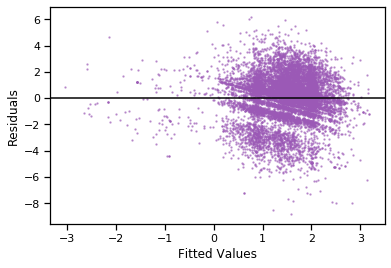

In [170]:
_ = plt.scatter(y_pred, (y_test - y_pred), s=2, alpha=0.5)
_ = plt.axhline(0, color='k')
_ = plt.xlabel('Fitted Values')
_ = plt.ylabel('Residuals')

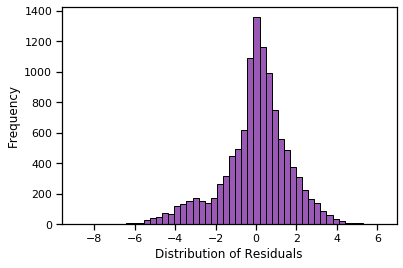

In [171]:
_ = plt.hist((y_test - y_pred), bins=50, ec='k')
_ = plt.xlabel('Distribution of Residuals')
_ = plt.ylabel('Frequency')

Here, I show the relationship between actual and predicted shelter times. The model clearly has room for improvement and is not great at predicting shelter times for animals who were actually in the shelter for a very short time.

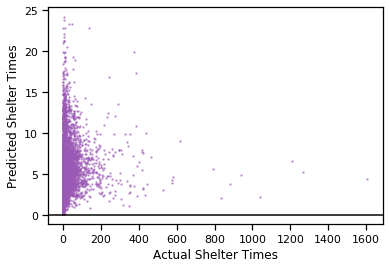

In [172]:
_ = plt.scatter(np.exp(y_test), np.exp(y_pred), s=2, alpha=0.5)
_ = plt.axhline(0, color='k')
_ = plt.xlabel('Actual Shelter Times')
_ = plt.ylabel('Predicted Shelter Times')

A zoomed-in version.

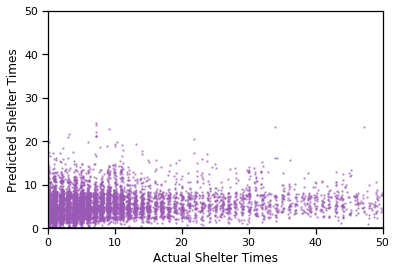

In [173]:
_ = plt.scatter(np.exp(y_test), np.exp(y_pred), s=2, alpha=0.5)
_ = plt.axhline(0, color='k')
_ = plt.ylim(0,50)
_ = plt.xlim(0,50)
_ = plt.xlabel('Actual Shelter Times')
_ = plt.ylabel('Predicted Shelter Times')

### Ridge Regression
I created another model using Ridge Regression. I thought this model would be particularly appropriate for this dataset since there is so much variation and not a lot of available data: by introducing a bias, we might see an improvement in ability to predict new data instead of overfitting to the available data.

I included all features in this model since Ridge regression will shrink features that do not contribute to the model's predictive power.

I found this model performed similarly well to OLS, with a maximum $R^2$ of 10.55% and an rmse of 1.7.

**[Ridge Regression Model](#Ridge-Regression-Final-Model)**

[Return to Linear Regression](#Linear-Regression)<br>
[Return to Table of Contents](#Analysis-Outline)

In [174]:
y = model_data['time_in_shelter_days_log']
X = model_data[all_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R^2: {:.2f}".format(model.score(X_test, y_test)*100))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print('Cross-Validation R^2 Scores: ', end=''), [print('{:.2f}%'.format(i*100), end=' ') for i in list(cross_val_score(model, X, y, cv=5))];

R^2: 10.45
Root Mean Squared Error: 1.7010084090911337
Cross-Validation R^2 Scores: 9.19% 10.81% 10.93% 6.83% 4.57% 

scikit-learn has a built in parameter selection function, like GridSearchCV, for Ridge regression. I use RidgeCV for cross-validation of the alpha parameter.

In [175]:
y = model_data['time_in_shelter_days_log']
X = model_data[all_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = RidgeCV(alphas=np.logspace(-10,10))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

optimal_alpha = model.alpha_

print('Optimal alpha: {}'.format(optimal_alpha))
print("R^2: {:.2f}".format(model.score(X_test, y_test)*100))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.3f}".format(rmse))
print('Cross-Validation R^2 Scores: ', end=''), [print('{:.2f}%'.format(i*100), end=' ') for i in list(cross_val_score(model, X, y, cv=5))];

Optimal alpha: 10.481131341546874
R^2: 10.55
Root Mean Squared Error: 1.700
Cross-Validation R^2 Scores: 9.34% 10.87% 11.08% 7.03% 4.69% 

### Ridge Regression Final Model

In [176]:
y = model_data['time_in_shelter_days_log']
X = model_data[all_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

ridge = Ridge(alpha=10.481131341546874)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print("R^2: {:.2f}".format(ridge.score(X_test, y_test)*100))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.3f}".format(rmse))
print('Cross-Validation R^2 Scores: ', end=''), [print('{:.2f}%'.format(i*100), end=' ') for i in list(cross_val_score(ridge, X, y, cv=5))];

R^2: 10.55
Root Mean Squared Error: 1.700
Cross-Validation R^2 Scores: 9.44% 10.87% 11.14% 7.03% 4.76% 

The residual plot for the Ridge model looks very similar to that for linear regression.

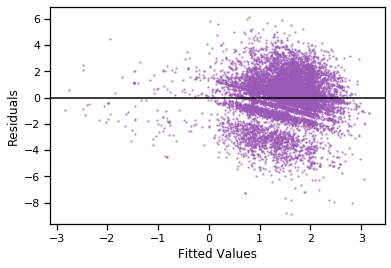

In [177]:
_ = plt.scatter(y_pred, (y_test - y_pred), s=2, alpha=0.5)
_ = plt.axhline(0, color='k')
_ = plt.xlabel('Fitted Values')
_ = plt.ylabel('Residuals')

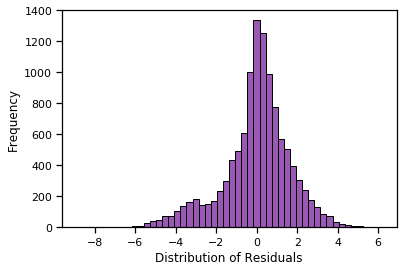

In [178]:
_ = plt.hist((y_test - y_pred), bins=50, ec='k')
_ = plt.xlabel('Distribution of Residuals')
_ = plt.ylabel('Frequency')

Again, the relationship between actual and predicted shelter times looks very similar to that for linear regression.

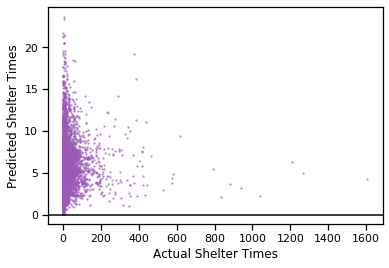

In [179]:
_ = plt.scatter(np.exp(y_test), np.exp(y_pred), s=2, alpha=0.5)
_ = plt.axhline(0, color='k')
_ = plt.xlabel('Actual Shelter Times')
_ = plt.ylabel('Predicted Shelter Times')

This zoomed-in version shows bars between actual shelter times and predicted times, perhaps as a result of the highly binary nature of the training data.

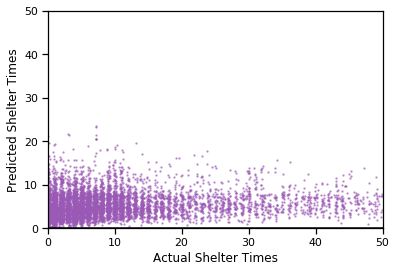

In [180]:
_ = plt.scatter(np.exp(y_test), np.exp(y_pred), s=2, alpha=0.5)
_ = plt.axhline(0, color='k')
_ = plt.ylim(0,50)
_ = plt.xlim(0,50)
_ = plt.xlabel('Actual Shelter Times')
_ = plt.ylabel('Predicted Shelter Times')

## Support Vector Regression (SVR)
As a result of the data being sparse with many features, I chose to use a Support Vector Regression (SVR). SVM models are known to be effective in high dimensional spaces. Additionally, only certain training data are used in the decision function, which I hoped would help with the stochastic nature of this dataset.

I continued to use $R^{2}$ to evaluate the efficacy of this model, in addition to RMSE. After scaling the data and optimizing parameters, I was able to obtain an $R^{2}$ of 14.06 and an RMSE of ~0.94, the best values yet.

1. [Data preprocessing](#SVR-Preprocessing)
2. [Feature selection](#SVR-Feature-Selection)
3. [Parameter optimization](#SVR-Parameter-Optimization)

**[SVR Model](#SVR-Final-Model)**

[Return to Predict Time in Shelter](#4.-Predict-time-in-shelter)<br>
[Return to Table of Contents](#Analysis-Outline)

In [181]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [182]:
def svr_results(y_test, X_test, y_pred, fitted_svr_model):
    
    print("C: {}".format(fitted_svr_model.C))
    print("Epsilon: {}".format(fitted_svr_model.epsilon))
    print("Intercept: {:,.3f}".format(fitted_svr_model.intercept_[0]))
    print("Mean Absolute Error: {:.3f}".format(mean_absolute_error(y_test, fitted_svr_model.predict(X_test))))
    print("Root Mean Squared Error: {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
    print("R^2: {:.2f}".format(fitted_svr_model.score(X_test, y_test)*100))

In [183]:
y = model_data['time_in_shelter_days_log']
X = model_data[all_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

svr_results(y_test, X_test, y_pred, svr)

C: 1.0
Epsilon: 0.1
Intercept: 1.197
Mean Absolute Error: 1.197
Root Mean Squared Error: 1.733
R^2: 7.04


### SVR Preprocessing
I used scikit-learn's preprocessor to scale the data, as recommended by the documentation, because SVM algorithms are not scale invariant.

[Return to SVR](#Support-Vector-Regression-(SVR))<br>
[Return to Table of Contents](#Analysis-Outline)

In [184]:
# using all data
y = model_data['time_in_shelter_days_log']
X = model_data[all_cols]

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

svr_results(y_test, X_test, y_pred, svr)

C: 1.0
Epsilon: 0.1
Intercept: 0.018
Mean Absolute Error: 0.664
Root Mean Squared Error: 0.945
R^2: 12.77


### SVR Feature Selection
Because SVR is more computationally expensive, I only examined the performance of the model on the top 114 features compared to all features.

[Return to SVR](#Support-Vector-Regression-(SVR))<br>
[Return to Table of Contents](#Analysis-Outline)

In [185]:
%%time
y = model_data['time_in_shelter_days_log']
X = model_data[top_feats]

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

svr_results(y_test, X_test, y_pred, svr)

C: 1.0
Epsilon: 0.1
Intercept: -0.132
Mean Absolute Error: 0.658
Root Mean Squared Error: 0.938
R^2: 14.06
CPU times: user 4min 28s, sys: 1.03 s, total: 4min 29s
Wall time: 4min 29s


### SVR Parameter Optimization
I initially tried to use GridSearchCV to optimize the parameters for this model; however, the run time was not sustainable (>6 hours). 

[Return to SVR](#Support-Vector-Regression-(SVR))<br>
[Return to Table of Contents](#Analysis-Outline)

In [186]:
%%time
parameters = {'C':[0.01, .1, 1, 10, 100], 'epsilon':[0.01, .1, 1, 10, 100]}

y = model_data['time_in_shelter_days_log']
X = model_data[top_feats]

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

clf.best_estimator_
print("R^2: {:.2f}".format(clf.score(X_test, y_test)*100))

R^2: 14.06
CPU times: user 1h 47min 29s, sys: 15.3 s, total: 1h 47min 44s
Wall time: 1h 47min 48s


### SVR Final Model
Note that results need to be inverse scaled, e.g.:<br>
```sc_y.inverse_transform(y_pred)```<br>
[Return to SVR](#Support-Vector-Regression-(SVR))<br>
[Return to Table of Contents](#Analysis-Outline)

In [187]:
X = model_data[top_feats]
y = model_data['time_in_shelter_days_log']

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

svr = SVR(C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

svr_results(y_test, X_test, y_pred, svr)

C: 1.0
Epsilon: 0.1
Intercept: -0.132
Mean Absolute Error: 0.658
Root Mean Squared Error: 0.938
R^2: 14.06


To look at the distribution of residuals for the SVR model, the data need to be reshaped and inverse transformed. 

Again, the distribution looks mostly normal, aside from the same clear lines we see from the other residual plots.

In [188]:
# reshape y_test
y_test = y_test.reshape(-1,)

# inverse transform y_pred and y_test
y_test = sc_y.inverse_transform(y_test)
y_pred = sc_y.inverse_transform(y_pred)

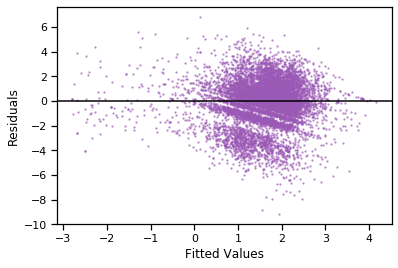

In [189]:
_ = plt.scatter(y_pred, (y_test - y_pred), s=2, alpha=0.5)
_ = plt.axhline(0, color='k')
_ = plt.xlabel('Fitted Values')
_ = plt.ylabel('Residuals')

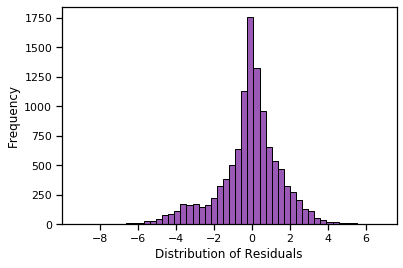

In [190]:
_ = plt.hist((y_test - y_pred), bins=50, ec='k')
_ = plt.xlabel('Distribution of Residuals')
_ = plt.ylabel('Frequency')

This model appears slightly improved at predicting shorter shelter times, with a bit of a linear trend.

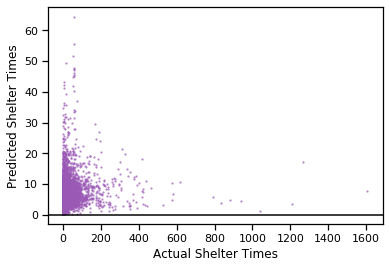

In [191]:
_ = plt.scatter(np.exp(y_test), np.exp(y_pred), s=2, alpha=0.5)
_ = plt.axhline(0, color='k')
_ = plt.xlabel('Actual Shelter Times')
_ = plt.ylabel('Predicted Shelter Times')

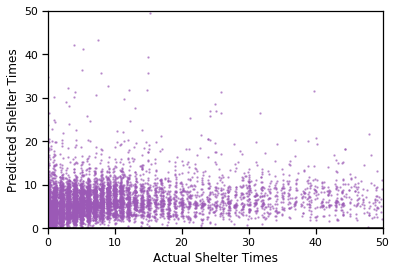

In [192]:
_ = plt.scatter(np.exp(y_test), np.exp(y_pred), s=2, alpha=0.5)
_ = plt.axhline(0, color='k')
_ = plt.ylim(0,50)
_ = plt.xlim(0,50)
_ = plt.xlabel('Actual Shelter Times')
_ = plt.ylabel('Predicted Shelter Times')

## Ensemble Methods
After working to optimize several different models, I decided to try a few ensemble methods to see if combining model results would improve overall predictive power and model performance.

1. [Averaging](#Averaging)
2. [Gradient Boosting](#Gradient-Boosting)

[Return to Predict Time in Shelter](#4.-Predict-time-in-shelter)<br>
[Return to Table of Contents](#Analysis-Outline)

In [193]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

### Averaging
Here, I average the results from the OLS, Ridge, and SVR models. I found that using only Ridge and SVR resulted in a slightly higher $R^2$ but also a higher error rate.

None of the models seemed extraordinarily better than the SVR model on its own; OLS and SVR together performed moderately.

In [194]:
# top features
y = model_data['time_in_shelter_days_log']
X = model_data[top_feats]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# provide scaled data for SVR
sc_X1 = StandardScaler()
sc_y1 = StandardScaler()
X_s = sc_X1.fit_transform(X)
y_s = sc_y1.fit_transform(y.values.reshape(-1,1))

X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_s, y_s, random_state=5)

# ols
ols1 = LinearRegression()
ols1.fit(X_train, y_train)
y_pred_ols = ols1.predict(X_test)

# ridge
ridge1 = Ridge(alpha=optimal_alpha)
ridge1.fit(X_train, y_train)
y_pred_ridge = ridge1.predict(X_test)

# svr
svr1 = SVR(C=1.0, epsilon=0.1)
svr1.fit(X_train_scale, y_train_scale)
y_pred_svr = sc_y1.inverse_transform(svr1.predict(X_test_scale))

In [195]:
# average all 3
y_pred_avg = (y_pred_ols+y_pred_ridge+y_pred_svr)/3

print("R^2: {:.2f}%".format(r2_score(y_test, y_pred_avg)*100))
print("Root Mean Squared Error: {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_pred_avg))))

R^2: 13.38%
Root Mean Squared Error: 1.673


In [196]:
# average only ols and svr
y_pred_avg = (y_pred_ols+y_pred_svr)/2

print("R^2: {:.2f}%".format(r2_score(y_test, y_pred_avg)*100))
print("Root Mean Squared Error: {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_pred_avg))))

R^2: 14.15%
Root Mean Squared Error: 1.665


In [197]:
# average only ols and ridge
y_pred_avg = (y_pred_ols+y_pred_ridge)/2

print("R^2: {:.2f}%".format(r2_score(y_test, y_pred_avg)*100))
print("Root Mean Squared Error: {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_pred_avg))))

R^2: 10.69%
Root Mean Squared Error: 1.699


In [198]:
# average only ridge and svr
y_pred_avg = (y_pred_ridge+y_pred_svr)/2

print("R^2: {:.2f}%".format(r2_score(y_test, y_pred_avg)*100))
print("Root Mean Squared Error: {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_pred_avg))))

R^2: 14.12%
Root Mean Squared Error: 1.666


### Gradient Boosting
I also included a gradient boosting model to see if this strategy could help improve the model. Boosting is the development of many sequential models, where each model attempts to correct errors made in the previous model. The final model is the weighted mean of many weaker models. Because all of my model attempts have been mediocre, I hoped that this type of ensemble method could help improve predictive power.

Gradient Boosting is highly resistant to overfitting, so I used 1,000 estimators.

This model had a much higher $R^2$ value of 18.26% and a similar RMSE to those in previous models (~1.63).

In [199]:
y = model_data['time_in_shelter_days_log']
X = model_data[top_feats]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

gbr = GradientBoostingRegressor(n_estimators=1000)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("R^2: {:.2f}%".format(r2_score(y_test, y_pred)*100))
print("Root Mean Squared Error: {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

R^2: 18.23%
Root Mean Squared Error: 1.625


Again, the distribuion of residuals looks mostly normal, with lines, although with this model, they are shifted closer to 0.

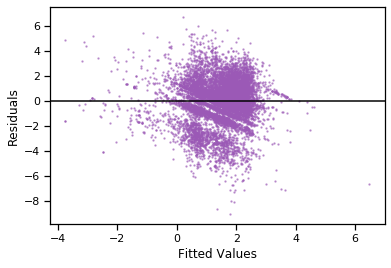

In [200]:
_ = plt.scatter(y_pred, (y_test - y_pred), s=2, alpha=0.5)
_ = plt.axhline(0, color='k')
_ = plt.xlabel('Fitted Values')
_ = plt.ylabel('Residuals')

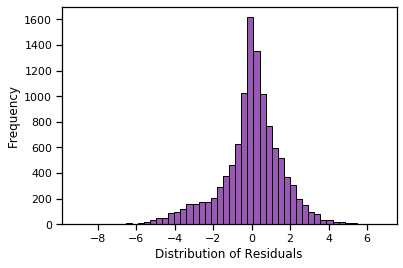

In [201]:
_ = plt.hist((y_test - y_pred), bins=50, ec='k')
_ = plt.xlabel('Distribution of Residuals')
_ = plt.ylabel('Frequency')

This model appears to have the ability to predict at least one long shelter time. 

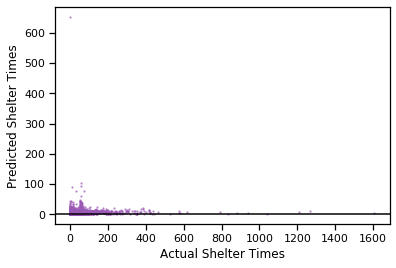

In [202]:
_ = plt.scatter(np.exp(y_test), np.exp(y_pred), s=2, alpha=0.5)
_ = plt.axhline(0, color='k')
_ = plt.xlabel('Actual Shelter Times')
_ = plt.ylabel('Predicted Shelter Times')

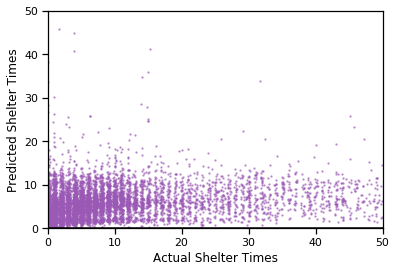

In [203]:
_ = plt.scatter(np.exp(y_test), np.exp(y_pred), s=2, alpha=0.5)
_ = plt.axhline(0, color='k')
_ = plt.ylim(0,50)
_ = plt.xlim(0,50)
_ = plt.xlabel('Actual Shelter Times')
_ = plt.ylabel('Predicted Shelter Times')

In general, none of these models are great or all that reliable; however, they may still be useful in helping predict general direction of adoption time.

## Model Testing
Test the four top-performing models, OLS, Ridge, SVR, and Gradient Boosting, using made-up data to determine potential shelter times.

### Intake Function
Create a function that can be used to determine potential shelter times for an animal.

[Return to Predict Time in Shelter](#4.-Predict-time-in-shelter)<br>
[Return to Table of Contents](#Analysis-Outline)

In [204]:
def animal_intake():
    intake_records = {}
    intake = {}
    animal_id = input('Animal ID: ')

    intake_records[animal_id] = intake
    
    age_years = input('Age (in years or half-years): ')
    intake['age_upon_intake_(days)'] = int(age_years)*365
    
    breed_raw = input('Breed: ')
    breed_raw = breed_raw.replace('Black/Tan Hound', 'Black-Tan Hound')
    breed_raw = breed_raw.replace('Dachshund Stan', 'Dachshund')
    breed_raw = breed_raw.replace('Dachshund Wirehair', 'Dachshund')
    breed_clean = breed_raw.replace(' Mix', '')
    breed_list = breed_clean.split('/')
    if len(breed_list) > 1:
        intake['mixed_breed'] = 1
    elif 'Mix' in breed_raw:
        intake['mixed_breed'] = 1
    else:
        intake['mixed_breed'] = 0
    for i in breed_list:
        intake[i] = 1
    
    intake_condition = input('Intake Condition (Normal, Injured, Sick, Nursing, Aged, Feral, Pregnant, or Other): ')
    intake[intake_condition] = 1
    
    intake_type = input('Intake Type (Stray, Owner Surrender, Public Assist, Wildlife, or Euthanasia Request): ')
    intake[intake_type] = 1
    
    sex_upon_intake = input('Sex upon Intake (Intact Male/Female, Neutered Male, Spayed Female, or Unknown): ')
    intake[sex_upon_intake] = 1
    
    color_raw = input('Color: ')
    color_list = color_raw.split('/')
    if len(color_list) > 1:
        intake['multicolor'] = 1
    elif 'Tricolor' in color_list:
        intake['multicolor'] = 1
    else:
        intake['multicolor'] = 0
    
    for i in color_list:
        intake[i] = 1
    
    intake_df = pd.DataFrame.from_dict(intake_records, orient='index')
    
    prediction = predict_results(intake_df)
    return prediction
    
def top_feature_prediction(X):
    # reshape data to only include top features
    # add missing columns
    for col in top_feats:
        if col in X.columns:
            next
        else:
            X[col] = 0
    
    # remove features not kept in top features
    for col in X.columns:
        if col not in top_feats:
            X = X.drop(columns=col)

    X = X.fillna(0)
    for i in X.columns:
        if i == 'age_upon_intake_(days)':
            X[i] = X[i].astype('int64')
        elif i == 'mixed_breed':
            X[i] = X[i].astype('float64')
        elif i == 'multicolor':
            X[i] = X[i].astype('float64')
        else:
            X[i] = X[i].astype('uint8')
    X = X[top_feats]
    return X

def all_feature_prediction(X):
    # reshape data to include all features
    # add missing columns
    for c in model_data.columns:
        if c in X.columns:
            next
        else:
            X[c] = 0
    X = X.drop(columns=['time_in_shelter_days_log', 'time_in_shelter_days'])
    
    X = X.fillna(0)
    for i in X.columns:
        if i == 'age_upon_intake_(days)':
            X[i] = X[i].astype('int64')
        elif i == 'mixed_breed':
            X[i] = X[i].astype('float64')
        elif i == 'multicolor':
            X[i] = X[i].astype('float64')
        else:
            X[i] = X[i].astype('uint8')
            
    X = X[all_cols]
    
    return X

def predict_results(X):
    print('\n\nPredicted Shelter Time: ')
    
    # ols
    y_ols = np.exp(ols.predict(top_feature_prediction(X)))
    print("OLS: {:.2f} days".format(y_ols[0]))
    
    # ridge
    y_ridge = np.exp(ridge.predict(all_feature_prediction(X)))
    print("Ridge: {:.2f} days".format(y_ridge[0]))
    
    # svr
    y_svr = np.exp(sc_y.inverse_transform(svr.predict(sc_X.transform(top_feature_prediction(X)))))
    print("SVR: {:.2f} days".format(y_svr[0]))

    # gradient boosting
    y_gbr = np.exp(gbr.predict(top_feature_prediction(X)))
    print("Gradient Boosting: {:.2f} days".format(y_gbr[0]))

### Test Animal A
Predict the shelter time for a 5-year-old neutered shorthaired chihuahua mix (yellow coloring) who was released by his owner. He is in good health.

In [205]:
X_a = animal_intake()

Animal ID: A
Age (in years or half-years): 5
Breed: Chihuahua Shorthair Mix
Intake Condition (Normal, Injured, Sick, Nursing, Aged, Feral, Pregnant, or Other): Normal
Intake Type (Stray, Owner Surrender, Public Assist, Wildlife, or Euthanasia Request): Owner Surrender
Sex upon Intake (Intact Male/Female, Neutered Male, Spayed Female, or Unknown): Neutered Male
Color: Yellow


Predicted Shelter Time: 
OLS: 2.78 days
Ridge: 2.76 days
SVR: 5.80 days
Gradient Boosting: 4.50 days


### Test Animal B
Predict the shelter time for a 3-year-old Pit Bull mix (white/black coloring) who was found as a pregnant stray. 

In [206]:
X_b = animal_intake()

Animal ID: B
Age (in years or half-years): 3
Breed: Pit Bull Mix
Intake Condition (Normal, Injured, Sick, Nursing, Aged, Feral, Pregnant, or Other): Pregnant
Intake Type (Stray, Owner Surrender, Public Assist, Wildlife, or Euthanasia Request): Stray
Sex upon Intake (Intact Male/Female, Neutered Male, Spayed Female, or Unknown): Intact Female
Color: White/Black


Predicted Shelter Time: 
OLS: 11.33 days
Ridge: 9.70 days
SVR: 8.11 days
Gradient Boosting: 12.94 days


### Test Animal C
Predict the shelter time for a spayed female, aged, 10-year-old chocolate Lab who was a public assist.

In [207]:
X_c = animal_intake()

Animal ID: C
Age (in years or half-years): 10
Breed: Labrador Retriever
Intake Condition (Normal, Injured, Sick, Nursing, Aged, Feral, Pregnant, or Other): Aged
Intake Type (Stray, Owner Surrender, Public Assist, Wildlife, or Euthanasia Request): Public Assist
Sex upon Intake (Intact Male/Female, Neutered Male, Spayed Female, or Unknown): Spayed Female
Color: Brown


Predicted Shelter Time: 
OLS: 3.03 days
Ridge: 2.98 days
SVR: 4.30 days
Gradient Boosting: 4.95 days


[Return to Table of Contents](#Analysis-Outline)